                                            ~ Bharath Bommeeshwar K ~

# <div style="color:white;display:fill;border-radius:5px;background-color:#8ABEB9;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:75%;margin:0;text-align:center">TEXT ANALYTICS - SPAM AND HAM CLASSIFICATION</p></div>

### <B><u>Problem Statement 

* The SMS Spam Collection v.1 (hereafter the corpus) is a set of SMS-tagged messages that have been collected for SMS Spam research. It contains one set of SMS messages in English of 5,574 messages, tagged according being ham (legitimate) or spam.

### <u><B>Objective
* To develop a SMS Spam Filter to classify spam / ham messages 

### <u> <B> Frame work

* 01. Data Acquisition
* 02. Data Preprocessing
* 03. Data Exploration

* 04. Splitting the data

* 05. TF - Vectorization
      - Models performance on Original TF data 
      - Models performance on PCA TF-IDF data

* 06. TF - IDF Vectorization
      - Models performance on Original TF-IDF data 
      - Models performance on PCA TF-IDF data

* 07. Doc2Vec 
      - Models performance on Original Doc2Vec data 
      - Models performance on PCA Doc2Vec data
  
* 08. Heuiristic method
      - Models performance on Original Heuiristic data 
      - Models performance on PCA Heuiristic data
  
* 09. Comparing the model results

* 10. Implementing the best model with approach on Test data

* 11. Conclusion

# .................................................................................................................................

### <font color= BLUE>1. DATA ACQUISITION

###### IMPORTING LIBRARIES

In [1]:
# Importing all the useful libraries

import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics as mat
import pickle 
import warnings
warnings.filterwarnings("ignore")
import nltk
from collections import Counter
from gensim.models import KeyedVectors
# scale the data
from sklearn.preprocessing import StandardScaler
# split the data
from sklearn.model_selection import train_test_split
# cross validation - grid search
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

#logistic regression
from sklearn.linear_model import LogisticRegression
#linear discriminant analysis
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

from sklearn.svm import SVC 

#knn neighbour model
from sklearn.neighbors import KNeighborsClassifier
#decision tree model
from sklearn.tree import DecisionTreeClassifier
#random forest
from sklearn.ensemble import RandomForestClassifier
#adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
#gradient boosting
from sklearn.ensemble import GradientBoostingClassifier
#calculate model performance
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as mse

#for cross validation
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score

#measure accuracy of predictions
from sklearn import metrics
#to get complete classification report
from sklearn.metrics import classification_report


##### READING THE DATA

In [2]:
# Changing the pandas settings 

#pd.set_option('display.max_rows', None)
#pd.set_option('display.max_columns', None)

#pd.reset_option('all') # To bring back default options back

In [3]:
# Public Corpus

#pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)

corpus=pd.read_excel("corpusfile.xlsx")
corpus

,SMS,Labels
0,"Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...",ham
1,Ok lar... Joking wif u oni...,ham
2,Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's,spam
3,U dun say so early hor... U c already then say...,ham
4,"Nah I don't think he goes to usf, he lives around here though",ham
...,...,...
5567,"This is the 2nd time we have tried 2 contact u. U have won the £750 Pound prize. 2 claim is easy, call 087187272008 NOW1! Only 10p per minute. BT-national-rate.",spam
5568,Will ü b going to esplanade fr home?,ham
5569,"Pity, * was in mood for that. So...any other suggestions?",ham
5570,The guy did some bitching but I acted like i'd be interested in buying something else next week and he gave it to us for free,ham


In [4]:
# Initial insight 
corpus.Labels.value_counts()   # Imbalanced dataset

ham     4825
spam    747 
Name: Labels, dtype: int64

<AxesSubplot:xlabel='Labels', ylabel='count'>

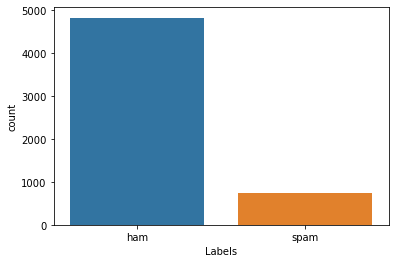

In [5]:
# Countplot
sns.countplot(corpus.Labels)

# .................................................................................................................................

### <font color= BLUE>2. DATA PREPROCESSING

#### Steps Involved: 

* Converting text into lower cases
* Removing stopwords 
* Removing white spaces
* Lemmatization

In [6]:
# Converting all the documents to string format for processing
corpus['SMS']=corpus['SMS'].astype(str)

In [7]:
stop_words = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [8]:
for i in range(len(corpus.SMS)):
    
    #1) Converting the text into lower cases
    
        corpus.SMS[i]=str(corpus.SMS[i]).lower()
     
    #2)Removing stopwords from all the SMS
    
        corpus.SMS[i]=" ".join([w for w in corpus.SMS[i].split() if w not in stop_words])
              
    #3) Removing white spaces from all SMS

        corpus.SMS[i] = corpus.SMS[i].replace("  ", " ").strip()
  

In [9]:
# Manually copy these files into the specified address below if its not downloading

#C:\Users\Al barak\AppData\Roaming\nltk_data\----

#nltk.download('punkt')
#nltk.download('wordnet')
#nltk.download('omw-1.4')  

import nltk
from nltk.stem import WordNetLemmatizer

In [10]:
#4) Lemmatization

lemmatizer = WordNetLemmatizer()

for i in range(len(corpus)):
    words = nltk.word_tokenize(corpus.SMS[i])
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    corpus.SMS[i] = ' '.join(words)

In [11]:
corpus.head()

,SMS,Labels
0,"go jurong point , crazy .. available bugis n great world la e buffet ... cine got amore wat ...",ham
1,ok lar ... joking wif u oni ...,ham
2,free entry 2 wkly comp win fa cup final tkts 21st may 2005. text fa 87121 receive entry question ( std txt rate ) & c 's apply 08452810075over18 's,spam
3,u dun say early hor ... u c already say ...,ham
4,"nah think go usf , life around though",ham


# .................................................................................................................................

### <font color= BLUE>3. DATA EXPLORATION

In [12]:
corpus_cloud = corpus

In [13]:
# remove punctuation to explore words

import string
p = string.punctuation

corpus_cloud['SMS'] = corpus_cloud['SMS'].str.replace('[{}]'.format(p), '')

In [14]:
corpus_cloud.head()

,SMS,Labels
0,go jurong point crazy available bugis n great world la e buffet cine got amore wat,ham
1,ok lar joking wif u oni,ham
2,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c s apply 08452810075over18 s,spam
3,u dun say early hor u c already say,ham
4,nah think go usf life around though,ham


### Word Cloud

In [15]:
#Spam and ham messages

spams=""
hams=""

for i in range(corpus_cloud.shape[0]):
    
    if corpus_cloud.Labels[i]=='spam':         
        spams+=corpus_cloud.SMS[i]
    else:
        hams+=corpus_cloud.SMS[i]

## Ham

In [16]:
words = corpus_cloud[corpus_cloud.Labels=='ham'].SMS.apply(lambda x: [word.lower() for word in str(x).split()])
ham_words = Counter() #

for msg in words:
            ham_words.update(msg)

print("Common words in ham and occurence counts:\n")
print(ham_words.most_common(10))

Common words in ham and occurence counts:

[('u', 1075), ('m', 388), ('gt', 318), ('s', 317), ('lt', 316), ('get', 314), ('2', 313), ('ok', 280), ('go', 278), ('call', 248)]


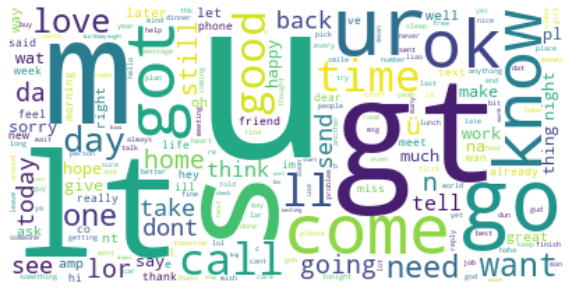

In [17]:
#Wordcloud for ham messages

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(hams)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig("Wordcloud-HAM.jpeg")

## Spam

In [18]:
words = corpus_cloud[corpus_cloud.Labels=='spam'].SMS.apply(lambda x: [word.lower() for word in x.split()])
spam_counter = Counter()

for msg in words:
    spam_counter.update(msg)

print("Common words in spam and occurence counts:\n")
print(spam_counter.most_common(10))

Common words in spam and occurence counts:

[('call', 359), ('free', 219), ('2', 176), ('u', 168), ('txt', 156), ('ur', 144), ('text', 138), ('mobile', 135), ('4', 123), ('stop', 118)]


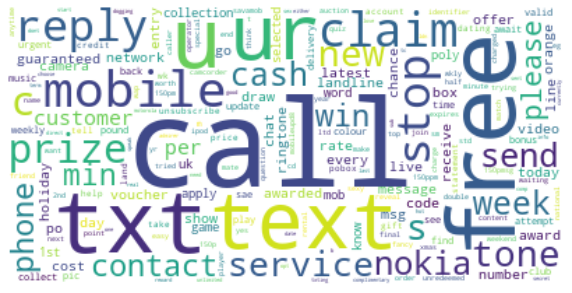

In [19]:
#Wordcloud for spam messages

word_cloud = WordCloud(collocations = False, background_color = 'white').generate(spams)
plt.figure(figsize=(10,12))
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()
#plt.savefig("Wordcloud-SPAM.jpeg")

# .................................................................................................................................

### <font color= BLUE> 4. SPLITTING THE DATASET

In [20]:
corpus_binary=corpus.copy()

#Label encoding target class
corpus_binary["Labels"] = corpus_binary["Labels"].replace({"ham":0,"spam":1})
corpus_binary.head()

,SMS,Labels
0,go jurong point crazy available bugis n great world la e buffet cine got amore wat,0
1,ok lar joking wif u oni,0
2,free entry 2 wkly comp win fa cup final tkts 21st may 2005 text fa 87121 receive entry question std txt rate c s apply 08452810075over18 s,1
3,u dun say early hor u c already say,0
4,nah think go usf life around though,0


In [21]:
corpus_binary.isna().sum()

SMS       0
Labels    0
dtype: int64

In [22]:
X = corpus_binary.drop(["Labels"],axis=1)
y = corpus_binary["Labels"]

In [23]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)  #70:30 split

In [24]:
# Training data cleaned splitted from main corpus
corpus_train = pd.concat([X_train,y_train],axis=1)

# Test data cleaned splitted from main corpus
corpus_test = pd.concat([X_test,y_test],axis=1)

In [25]:
corpus_train.to_csv("corpus_train.csv",index=False)
corpus_test.to_csv("corpus_test.csv",index=False)

In [26]:
corpus_train = pd.read_csv("corpus_train.csv")
corpus_test = pd.read_csv("corpus_test.csv")

In [27]:
corpus_train = corpus_train.dropna(axis=0)

In [28]:
corpus_train.head(2)

,SMS,Labels
0,goal arsenal 4 henry 7 v liverpool 2 henry score simple shot 6 yard pas bergkamp give arsenal 2 goal margin 78 min,1
1,said gon na snow start around 8 9 pm tonite predicting inch accumulation,0


In [29]:
corpus_train.shape

(3899, 2)

In [30]:
corpus_test = corpus_test.dropna(axis=0)

In [31]:
corpus_test.shape

(1671, 2)

# .................................................................................................................................

### <font color= BLUE>5. TF-VECTORIZATION

###  <i> Creating Document-Term Matrix </i>

### 1. Get the Bag-Of-Words (BOW) Dataframe

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
#using count vectoroizer to create a document-term matrix

cv = CountVectorizer()
X = cv.fit_transform(corpus_train.SMS)
vector_array=X.toarray()

In [34]:
# The vector form

vector_array

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [35]:
# The words list
names=cv.get_feature_names()
#names

In [36]:
#Converting the document-term matrix to a dataframe

DTM = pd.DataFrame(data=vector_array,columns = names)
DTM

,008704050406,0089,0121,01223585334,02,020603,0207,02070836089,02072069400,02073162414,...,zaher,zealand,zed,zero,zhong,zindgi,zoe,zogtorius,zyada,〨ud
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 2. Dimension Reduction

### <font color= ORANGE> Approach 1 - Dropping texts that appear in less than 0.5% of the documents

In [37]:
#Remove terms that is contained in less than 0.5% of the documents

DTM.apply(lambda x: np.sum(x)/len(x), axis=0)


008704050406    0.000256
0089            0.000256
0121            0.000256
01223585334     0.000513
02              0.000256
                  ...   
zindgi          0.000513
zoe             0.000513
zogtorius       0.000256
zyada           0.000256
〨ud             0.000256
Length: 6871, dtype: float64

In [38]:
import time
start = time.time()

for col in list(DTM):
    prop=DTM[col].sum()/DTM.shape[0]
    if prop*100<0.5:
        DTM=DTM.drop([col],axis=1)
        
end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")        

timetaken: 7.28 min


In [39]:
DTM.to_csv("TF_DTM_0.5%.csv",index=False)

In [40]:
DTM=pd.read_csv('TF_DTM_0.5%.csv')
DTM

,100,1000,150,150p,16,18,1st,2000,2nd,500,...,would,xmas,xxx,ya,yeah,year,yes,yet,yo,yup
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3895,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3897,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data into train - validation set

In [41]:
X = DTM
y = corpus_train["Labels"]

In [42]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [43]:
# Intializing objects 

tf_lr_1 = LogisticRegression()                   #logistic regression
tf_rf_1 = RandomForestClassifier()               #random forest
tf_ab_1 = AdaBoostClassifier()                   #adaboost
tf_gb_1 = GradientBoostingClassifier()           #gradientboost
tf_knn_1 = KNeighborsClassifier()                #knn classifier
tf_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
tf_svm_1 = SVC()                                 #support vector machines_classifier

In [44]:
# default model performance on test data
import time
start = time.time()

L = [tf_lr_1,tf_rf_1,tf_ab_1,tf_gb_1,tf_knn_1,tf_ldm_1,tf_svm_1] # List of models

tf_acc_1 = []
tf_f_1 = []
tf_auroc_1 = []
tf_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    tf_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    tf_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    tf_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    tf_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":tf_acc_1,"f1_score":tf_f_1,"auroc":tf_auroc_1,"recall_score":tf_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.1681864341100057 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.975641,0.901554,0.913545,0.828571
RandomForest,0.973077,0.897561,0.932169,0.876190
AdaptiveBoosting,0.961538,0.843750,0.881270,0.771429
Gradient_Boosting,0.969231,0.870968,0.885714,0.771429
KNeighourestNeighbour,0.935897,0.691358,0.765926,0.533333
LinearDiscriminantClassifier,0.970513,0.878307,0.894497,0.790476
SupportVectorclassifier,0.971795,0.884211,0.899259,0.800000


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>LOGISTIC REGRESSION

#### Choosing best parameters

In [ ]:
start = time.time()

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

tf_lr_2 =RandomizedSearchCV(estimator=tf_lr_1, param_distributions=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
tf_lr_2.fit(X_train, y_train)


end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

tf_lr_2.best_params_

#### Model testing with best parameters

In [46]:
tf_lr_2 = LogisticRegression(solver= 'sag', penalty= 'l2', C= 100 ,random_state=42)
tf_lr_2.fit(X_train,y_train) 

LogisticRegression(C=100, random_state=42, solver='sag')

In [47]:
#Prediction on validation data
y_pred = tf_lr_2.predict(X_valid)

In [48]:
#accuracy score
tf_lr_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",tf_lr_acc_2)

#f1 score
tf_lr_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",tf_lr_f1_2)

#auroc score
tf_lr_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",tf_lr_auroc_2)

#recall
tf_lr_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",tf_lr_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9769230769230769
F1 Score: 0.9081632653061225
Auroc: 0.9223280423280424
Recall 0.8476190476190476
[[673   2]
 [ 16  89]]


##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [216]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

tf_rf_2 = RandomizedSearchCV(estimator=tf_rf_1, param_distributions=params,n_iter=50,cv=5)
tf_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

tf_rf_2.best_params_

timetaken: 1.882846426963806 min


{'class_weight': {0: 4.5, 1: 1}}

#### Model evaluation with best parameters

In [49]:
tf_rf_2 = RandomForestClassifier(class_weight = {0: 4.5, 1: 1},random_state=42)
tf_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 4.5, 1: 1}, random_state=42)

In [50]:
#Prediction on test data
y_pred = tf_rf_2.predict(X_valid)

In [51]:
#accuracy score
tf_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",tf_rf_acc_2)

#f1 score
tf_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",tf_rf_f1_2)

#auroc score
tf_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",tf_rf_auroc_2)

#recall
tf_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",tf_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9782051282051282
F1 Score: 0.9170731707317075
Auroc: 0.9431746031746032
Recall 0.8952380952380953
[[669   6]
 [ 11  94]]


##### <font color= GREEN ><u>SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [220]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
tf_svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
tf_svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",tf_svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.867 total time=   0.5s
[CV 2/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.867 total time=   0.4s
[CV 3/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.6s
[CV 4/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.5s
[CV 5/5] END ...C=10, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.5s
[CV 1/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.867 total time=   0.6s
[CV 2/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.867 total time=   0.6s
[CV 3/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.865 total time=   0.5s
[CV 4/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.865 total time=   0.5s
[CV 5/5] END .C=0.01, gamma=0.1, kernel=sigmoid;, score=0.865 total time=   0.5s
[CV 1/5] END ......C=50, gamma=0.1, kernel=poly;, score=0.941 total time=   0.9s
[CV 2/5] END ......C=50, gamma=0.1, kernel=poly;

#### Model evaluation with best parameters

In [52]:
#fitting the model with best parameter
tf_svc_cv = SVC(kernel = 'rbf', gamma = 0.01, C = 50)
tf_svc_cv.fit(X_train,y_train)

SVC(C=50, gamma=0.01)

In [53]:
#Prediction on test data with best parameters
y_pred = tf_svc_cv.predict(X_valid)

In [54]:
#accuracy score
tf_svc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",tf_svc_acc_2)

tf_svc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",tf_svc_f1_2)

tf_svc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",tf_svc_auroc_2)

#recall
tf_svc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",tf_svc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9756410256410256
F1 Score: 0.9064039408866995
Auroc: 0.9336507936507936
Recall 0.8761904761904762
[[669   6]
 [ 13  92]]


In [56]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["LogisticRegression","RandomForest","SupportVectorclassifier"]

df1 = pd.DataFrame({"Accuracy":tf_acc_1,"F1_score":tf_f_1,"Auroc":tf_auroc_1,"Recall":tf_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[tf_lr_acc_2,tf_rf_acc_2,tf_svc_acc_2],
                    "F1_Score":[tf_lr_f1_2,tf_rf_f1_2,tf_svc_f1_2],
                    "Auroc":[tf_lr_auroc_2,tf_rf_auroc_2,tf_svc_auroc_2],
                   "Recall":[tf_lr_recall_score_2,tf_rf_recall_score_2,tf_svc_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.975641,0.901554,0.913545,0.828571
RandomForest,0.973077,0.897561,0.932169,0.876190
AdaptiveBoosting,0.961538,0.843750,0.881270,0.771429
Gradient_Boosting,0.969231,0.870968,0.885714,0.771429
KNeighourestNeighbour,0.935897,0.691358,0.765926,0.533333
LinearDiscriminantClassifier,0.970513,0.878307,0.894497,0.790476
SupportVectorclassifier,0.971795,0.884211,0.899259,0.800000
,Accuracy,F1_Score,Auroc,Recall
LogisticRegression,0.976923,0.908163,0.922328,0.847619
RandomForest,0.978205,0.917073,0.943175,0.895238


### <font color= ORANGE>Approach 2 - Principal Component Analysis

* PCA on the above unscaled data of TF vectorization

In [57]:
X = DTM
y = corpus_train["Labels"]

In [58]:
print(X.shape)
print(y.shape)

(3899, 333)
(3899,)


In [59]:
# Applying PCA

from sklearn.decomposition import PCA

pca=PCA()
pca_comp=pca.fit_transform(X)
pca_tf=pd.DataFrame(pca_comp)
pca_tf

,0,1,2,3,4,5,6,7,8,9,...,323,324,325,326,327,328,329,330,331,332
0,-0.063381,-0.034279,-0.110677,-0.025533,-0.016829,-0.090004,-0.088772,-0.048780,0.041460,0.028919,...,-0.004662,-0.021956,0.003625,-0.048353,-0.038494,0.002538,0.006870,0.023954,-0.003034,-0.000643
1,-0.072051,-0.179209,-0.100737,-0.056684,-0.056507,0.019682,-0.077629,0.050732,0.018347,0.028015,...,-0.017454,-0.008658,0.013090,-0.009097,0.003371,-0.002541,-0.016141,0.005611,0.005247,0.012956
2,-0.085491,-0.128622,-0.108009,-0.063648,-0.009840,-0.146025,-0.094809,0.005736,0.047850,-0.040586,...,-0.001691,-0.002690,0.000636,0.000184,-0.000103,0.000769,-0.000475,-0.000602,0.000519,0.000563
3,-0.080399,-0.171667,-0.101340,-0.051017,0.000030,-0.001542,-0.061515,0.007052,0.036373,0.463344,...,0.012151,0.010889,0.006704,0.005744,0.003584,-0.002349,0.002878,0.001516,0.002209,-0.001173
4,-0.087358,-0.136600,-0.107857,-0.054228,-0.015946,-0.135332,-0.080278,0.008847,0.069246,-0.038805,...,-0.001453,0.006624,0.001045,-0.000898,-0.002211,-0.001655,-0.000625,-0.001830,0.027012,-0.001389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,-0.025857,-0.224161,0.008927,0.288697,0.016096,-0.002919,-0.139728,-0.160659,0.243594,0.004567,...,0.006158,-0.007096,0.005503,0.007090,-0.008786,-0.002756,0.008442,-0.006062,0.002455,-0.016175
3895,-0.088867,-0.135837,0.220723,-0.140875,-0.356971,0.578323,-0.395947,0.444738,0.129379,-0.144336,...,-0.035072,0.007672,-0.003671,-0.015021,0.005515,-0.011027,0.003542,-0.004135,0.000642,0.009868
3896,-0.029968,-0.230499,0.077960,0.431161,-0.074933,0.060429,-0.038544,-0.060936,-0.216424,-0.009341,...,-0.014312,-0.017762,-0.017229,0.011759,0.023944,0.010088,0.010262,-0.005473,-0.000103,0.004415
3897,-0.077910,-0.255338,-0.045288,0.148298,-0.048758,0.028328,-0.100405,0.053393,0.019397,0.059589,...,-0.003083,0.022224,-0.017474,0.019169,0.005286,0.003042,-0.001021,0.001404,-0.007975,-0.005734


In [60]:
pca_tf.shape

(3899, 333)

### Variance Proportion

In [61]:
pca.explained_variance_ratio_

array([0.06078646, 0.03021694, 0.02297485, 0.01993406, 0.01720834,
       0.01464126, 0.01350899, 0.0132157 , 0.01169216, 0.01116158,
       0.010274  , 0.01022103, 0.01002743, 0.00983557, 0.00968402,
       0.00960119, 0.00902153, 0.00880102, 0.00848306, 0.00816807,
       0.00808781, 0.00789553, 0.00782114, 0.00753376, 0.00744503,
       0.00707794, 0.00697743, 0.00679554, 0.00670363, 0.00659938,
       0.0064266 , 0.00629455, 0.00615945, 0.00604939, 0.0060345 ,
       0.00589451, 0.00581844, 0.00579584, 0.00569938, 0.00566172,
       0.00561149, 0.00548543, 0.005385  , 0.00530252, 0.00523831,
       0.00518564, 0.00505877, 0.00498806, 0.0049519 , 0.00491267,
       0.00482642, 0.00479644, 0.00472413, 0.00463605, 0.00456364,
       0.00452635, 0.00448159, 0.0044328 , 0.00437339, 0.00433371,
       0.00432031, 0.00423773, 0.0041953 , 0.00417777, 0.00406692,
       0.00403217, 0.0039547 , 0.00391914, 0.00388562, 0.00382884,
       0.00378005, 0.00373025, 0.00367325, 0.0036526 , 0.00362

Text(0, 0.5, 'Variance ratio')

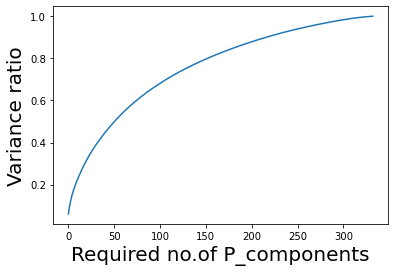

In [62]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [63]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06078646, 0.0910034 , 0.11397825, 0.13391231, 0.15112065,
       0.16576191, 0.1792709 , 0.1924866 , 0.20417876, 0.21534034,
       0.22561434, 0.23583537, 0.2458628 , 0.25569837, 0.26538239,
       0.27498357, 0.2840051 , 0.29280612, 0.30128918, 0.30945725,
       0.31754506, 0.32544059, 0.33326173, 0.3407955 , 0.34824053,
       0.35531846, 0.36229589, 0.36909143, 0.37579506, 0.38239444,
       0.38882104, 0.3951156 , 0.40127504, 0.40732443, 0.41335893,
       0.41925344, 0.42507188, 0.43086772, 0.43656711, 0.44222883,
       0.44784032, 0.45332575, 0.45871075, 0.46401327, 0.46925158,
       0.47443722, 0.47949599, 0.48448405, 0.48943595, 0.49434862,
       0.49917504, 0.50397148, 0.5086956 , 0.51333165, 0.51789529,
       0.52242164, 0.52690323, 0.53133603, 0.53570942, 0.54004313,
       0.54436344, 0.54860117, 0.55279647, 0.55697424, 0.56104116,
       0.56507333, 0.56902803, 0.57294717, 0.57683279, 0.58066163,
       0.58444168, 0.58817193, 0.59184518, 0.59549777, 0.59912

In [64]:
# 95 % variance explainability is our objective

np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

72

In [65]:
# Count of variables that could explain 95% of the variance

variables=pca_tf.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

261

In [66]:
333-261

72

* <B> From the PCA, even without last 72 variables its possible around 95 % of the variance, we'll drop last 72 columns

In [67]:
# Dropping variables

p_pca_tf=pca_tf.iloc[:,0:variables]
p_pca_tf

,0,1,2,3,4,5,6,7,8,9,...,251,252,253,254,255,256,257,258,259,260
0,-0.063381,-0.034279,-0.110677,-0.025533,-0.016829,-0.090004,-0.088772,-0.048780,0.041460,0.028919,...,-0.102113,0.029813,-0.026300,0.017692,-0.011377,-0.069964,0.008241,-0.030504,0.055166,0.043780
1,-0.072051,-0.179209,-0.100737,-0.056684,-0.056507,0.019682,-0.077629,0.050732,0.018347,0.028015,...,-0.066354,-0.000221,-0.080096,-0.030985,0.045059,0.006294,-0.047814,0.019211,0.013295,0.023762
2,-0.085491,-0.128622,-0.108009,-0.063648,-0.009840,-0.146025,-0.094809,0.005736,0.047850,-0.040586,...,-0.002572,0.005128,0.005563,0.000463,-0.001811,-0.002281,-0.002479,-0.004418,-0.008196,0.005276
3,-0.080399,-0.171667,-0.101340,-0.051017,0.000030,-0.001542,-0.061515,0.007052,0.036373,0.463344,...,-0.001980,0.014179,-0.018032,0.020269,0.029659,-0.002914,-0.010036,-0.002020,-0.007305,0.011844
4,-0.087358,-0.136600,-0.107857,-0.054228,-0.015946,-0.135332,-0.080278,0.008847,0.069246,-0.038805,...,-0.020957,-0.010121,0.012134,-0.069444,-0.034627,0.051904,0.007433,0.040054,0.008902,-0.080789
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,-0.025857,-0.224161,0.008927,0.288697,0.016096,-0.002919,-0.139728,-0.160659,0.243594,0.004567,...,-0.007603,0.025277,-0.007417,-0.040326,0.046328,0.062508,0.030870,-0.020239,-0.027025,-0.023200
3895,-0.088867,-0.135837,0.220723,-0.140875,-0.356971,0.578323,-0.395947,0.444738,0.129379,-0.144336,...,-0.036088,-0.041808,0.001736,-0.020800,-0.062674,-0.011334,0.065501,0.049451,0.025755,-0.018067
3896,-0.029968,-0.230499,0.077960,0.431161,-0.074933,0.060429,-0.038544,-0.060936,-0.216424,-0.009341,...,0.000174,0.043378,-0.016178,0.012929,0.006835,-0.040432,-0.037666,-0.032455,-0.035512,0.010018
3897,-0.077910,-0.255338,-0.045288,0.148298,-0.048758,0.028328,-0.100405,0.053393,0.019397,0.059589,...,0.305830,0.080374,-0.020028,-0.073886,0.113458,0.037444,0.296509,-0.078680,-0.086869,-0.264888


In [68]:
p_pca_tf.to_csv("PCA_TF.csv",index=False)

In [69]:
p_pca_tf = pd.read_csv("PCA_TF.csv")

### Visualizing the word vectors using First 2PCA

In [70]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_tf)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])#,index=p_pca_tf.index)

In [71]:
principalDf['Label'] = corpus_train["Labels"]
principalDf

,PC1,PC2,Label
0,-0.063381,-0.034272,1.0
1,-0.072051,-0.179279,0.0
2,-0.085491,-0.128639,0.0
3,-0.080399,-0.171673,0.0
4,-0.087358,-0.136608,0.0
...,...,...,...
3894,-0.025858,-0.223863,0.0
3895,-0.088867,-0.135858,0.0
3896,-0.029966,-0.230584,0.0
3897,-0.077910,-0.255257,0.0


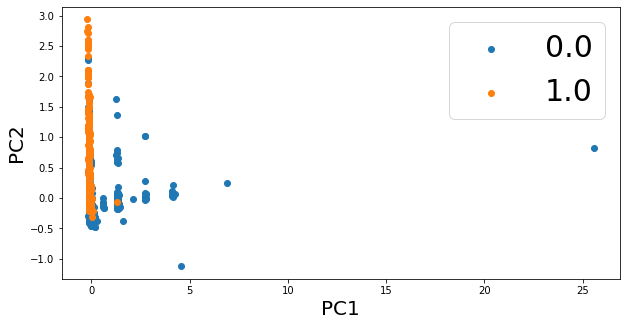

In [72]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(10,5))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


* <b> With 261 PCA variables of TF Vector

In [73]:
X = p_pca_tf    
y = corpus_train["Labels"]

In [74]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [75]:
# Intializing objects 

ptf_lr_1 = LogisticRegression()                   #logistic regression
ptf_rf_1 = RandomForestClassifier()               #random forest
ptf_ab_1 = AdaBoostClassifier()                   #adaboost
ptf_gb_1 = GradientBoostingClassifier()           #gradientboost
ptf_knn_1 = KNeighborsClassifier()                #knn classifier
ptf_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
ptf_svm_1 = SVC()                                 #support vector machines_classifier

In [ ]:
# default model performance on test data
import time
start = time.time()

L = [ptf_lr_1,ptf_rf_1,ptf_ab_1,ptf_gb_1,ptf_knn_1,ptf_ldm_1,ptf_svm_1] # List of models

ptf_acc_1 = []
ptf_f_1 = []
ptf_auroc_1 = []
ptf_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    ptf_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    ptf_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    ptf_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    ptf_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":ptf_acc_1,"f1_score":ptf_f_1,"auroc":ptf_auroc_1,"recall_score":ptf_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>LOGISTIC REGRESSION

#### Choosing best parameters

In [177]:
start = time.time()

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

ptf_lr_2 =RandomizedSearchCV(estimator=ptf_lr_1, param_distributions=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
ptf_lr_2.fit(X_train, y_train)


end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

ptf_lr_2.best_params_

timetaken: 13.298233270645142 min


{'solver': 'lbfgs', 'penalty': 'l2', 'C': 10}

#### Model testing with best parameters

In [82]:
ptf_lr_2 = LogisticRegression(solver= 'lbfgs', penalty= 'l2', C= 10 ,random_state=42)
ptf_lr_2.fit(X_train,y_train) 

LogisticRegression(C=10, random_state=42)

In [83]:
#Prediction on validation data
y_pred = ptf_lr_2.predict(X_valid)

In [84]:
#accuracy score
ptf_lr_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ptf_lr_acc_2)

#f1 score
ptf_lr_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ptf_lr_f1_2)

#auroc score
ptf_lr_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ptf_lr_auroc_2)

#recall
ptf_lr_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ptf_lr_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9717948717948718
F1 Score: 0.8910891089108911
Auroc: 0.9233862433862434
Recall 0.8571428571428571
[[668   7]
 [ 15  90]]


##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [183]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

ptf_rf_2 = RandomizedSearchCV(estimator=rf_1, param_distributions=params,n_iter=50,cv=5)
ptf_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

ptf_rf_2.best_params_

timetaken: 6.9659683783849085 min


{'class_weight': {0: 2.0, 1: 1}}

#### Model evaluation with best parameters

In [85]:
ptf_rf_2 = RandomForestClassifier(class_weight = {0: 2, 1: 1},random_state=42)
ptf_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 2, 1: 1}, random_state=42)

In [86]:
#Prediction on test data
y_pred = ptf_rf_2.predict(X_valid)

In [87]:
#accuracy score
ptf_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ptf_rf_acc_2)

#f1 score
ptf_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ptf_rf_f1_2)

#auroc score
ptf_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ptf_rf_auroc_2)

#recall
ptf_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ptf_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9564102564102565
F1 Score: 0.8282828282828283
Auroc: 0.8823280423280423
Recall 0.780952380952381
[[664  11]
 [ 23  82]]


##### <font color= GREEN ><u>GRADIENT BOOSTING

#### Choosing best parameters

In [104]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[8,10,12,14],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,600,100)
       }

#Initializing gradient boosting object
ptf_gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
ptf_gb_cv = RandomizedSearchCV(gb, param_distributions=grid,n_iter=10,cv = 5) #50fols -320min 
ptf_gb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",ptf_gb_cv.best_params_)

timetaken: 320.82 min
Best Parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.05}


#### Model evaluation with best parameters

In [88]:
#fitting the model with best parameter
start = time.time()

ptf_gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth =12, n_estimators = 500,random_state=42)
ptf_gb2.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 6.42 min


In [89]:
#Prediction on validation data
y_pred = ptf_gb2.predict(X_valid)

In [90]:
#accuracy score
ptf_gb_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ptf_gb_acc_2)

#f1 score
ptf_gb_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ptf_gb_f1_2)

#auroc score
ptf_gb_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ptf_gb_auroc_2)

#recall
ptf_gb_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ptf_gb_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9576923076923077
F1 Score: 0.8436018957345972
Auroc: 0.9112169312169313
Recall 0.8476190476190476
[[658  17]
 [ 16  89]]


In [91]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["LogisticRegression","RandomForest","Gradient_Boosting"]

df1 = pd.DataFrame({"Accuracy":ptf_acc_1,"F1_score":ptf_f_1,"Auroc":ptf_auroc_1,"Recall":ptf_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[ptf_lr_acc_2,ptf_rf_acc_2,ptf_gb_acc_2],
                    "F1_Score":[ptf_lr_f1_2,ptf_rf_f1_2,ptf_gb_f1_2],
                    "Auroc":[ptf_lr_auroc_2,ptf_rf_auroc_2,ptf_gb_auroc_2],
                   "Recall":[ptf_lr_recall_score_2,ptf_rf_recall_score_2,ptf_gb_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.975641,0.902564,0.917566,0.838095
RandomForest,0.970513,0.880829,0.902540,0.809524
AdaptiveBoosting,0.961538,0.858491,0.921481,0.866667
Gradient_Boosting,0.970513,0.885572,0.918624,0.847619
KNeighourestNeighbour,0.942308,0.730539,0.789735,0.580952
LinearDiscriminantClassifier,0.971795,0.884211,0.899259,0.800000
SupportVectorclassifier,0.971795,0.884211,0.899259,0.800000
,Accuracy,F1_Score,Auroc,Recall
LogisticRegression,0.971795,0.891089,0.923386,0.857143
RandomForest,0.956410,0.828283,0.882328,0.780952


##### OBSERVATIONS FROM TF APPROACH:

* <font color= RED><b>LOGISTIC REGRESSION model performed the best with Unscaled data with a F1 score of 0.94
* <font color= RED><b>LOGISTIC REGRESSION model performed the best with Scaled data(PCA 261var) with a F1 score of 0.89

Note: The model performance changes for different random statesi.e. based on the samples chosen for training and testing.    
    

# .................................................................................................................................

### <font color= BLUE>6. TF-IDF VECTORIZATION

###  <i> Creating Document-Term Matrix </i>

### 1. Get the Bag-Of-Words (BOW) Dataframe with TF-IDF Vectorizer

In [92]:
corpus_train = pd.read_csv("corpus_train.csv")
corpus_train = corpus_train.dropna(axis=0)

In [93]:
#TF-IDF vectorization for SMS column
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer=TfidfVectorizer()
tfidf_vectors=tfidf_vectorizer.fit_transform(corpus_train.SMS)   # Fit transform
names=tfidf_vectorizer.get_feature_names()                       # feature names

In [94]:
#Converting the above compressed object into numpy array

tfidf_vectors=tfidf_vectors.toarray()

#Converting the above array into data frame with proper column names
DTM =pd.DataFrame(tfidf_vectors,columns=names)
DTM

,008704050406,0089,0121,01223585334,02,020603,0207,02070836089,02072069400,02073162414,...,zaher,zealand,zed,zero,zhong,zindgi,zoe,zogtorius,zyada,〨ud
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3895,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


### 2. Dimension Reduction

### <font color= ORANGE> Approach 1 - Dropping texts that appear in less than 0.5% of the documents

In [95]:
#Remove terms that is contained in less than 0.5% of the documents

DTM.apply(lambda x: np.sum(x)/len(x), axis=0)


008704050406    0.000071
0089            0.000065
0121            0.000092
01223585334     0.000121
02              0.000084
                  ...   
zindgi          0.000082
zoe             0.000151
zogtorius       0.000103
zyada           0.000041
〨ud             0.000088
Length: 6871, dtype: float64

In [96]:
import time
start = time.time()

for col in list(DTM):
    prop=DTM[col].sum()/DTM.shape[0]
    if prop*100<0.5:
        DTM=DTM.drop([col],axis=1)
        
end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")        

timetaken: 7.25 min


In [97]:
DTM.to_csv("TFIDF_DTM_0.5%.csv",index=False)

In [98]:
DTM=pd.read_csv('TFIDF_DTM_0.5%.csv')
DTM

,anything,back,call,come,da,day,dear,dont,free,get,...,today,txt,ur,want,wat,way,well,work,yeah,yes
0,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.50099,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3895,0.0,0.0,0.0,0.00000,0.0,0.000000,0.000000,0.0,0.0,0.338081,...,0.0,0.0,0.0,0.0,0.0,0.0,0.459252,0.0,0.0,0.0
3896,0.0,0.0,0.0,0.00000,0.0,0.257777,0.000000,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3897,0.0,0.0,0.0,0.00000,0.0,0.000000,0.219554,0.0,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


### Splitting data into train - validation set

In [99]:
X = DTM
y = corpus_train["Labels"]

In [100]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [101]:
# Intializing objects 

tfidf_lr_1 = LogisticRegression()                   #logistic regression
tfidf_rf_1 = RandomForestClassifier()               #random forest
tfidf_ab_1 = AdaBoostClassifier()                   #adaboost
tfidf_gb_1 = GradientBoostingClassifier()           #gradientboost
tfidf_knn_1 = KNeighborsClassifier()                #knn classifier
tfidf_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
tfidf_svm_1 = SVC()                                 #support vector machines_classifier

In [102]:
# default model performance on test data
import time
start = time.time()

L = [tfidf_lr_1,tfidf_rf_1,tfidf_ab_1,tfidf_gb_1,tfidf_knn_1,tfidf_ldm_1,tfidf_svm_1] # List of models

tfidf_acc_1 = []
tfidf_f_1 = []
tfidf_auroc_1 = []
tfidf_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    tfidf_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    tfidf_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    tfidf_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    tfidf_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":tfidf_acc_1,"f1_score":tfidf_f_1,"auroc":tfidf_auroc_1,"recall_score":tfidf_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.034309168656667076 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.883333,0.283465,0.582751,0.171429
RandomForest,0.961538,0.854369,0.909418,0.838095
AdaptiveBoosting,0.958974,0.841584,0.895873,0.809524
Gradient_Boosting,0.957692,0.834171,0.887090,0.790476
KNeighourestNeighbour,0.948718,0.793814,0.857778,0.733333
LinearDiscriminantClassifier,0.901282,0.521739,0.689630,0.400000
SupportVectorclassifier,0.953846,0.814433,0.868783,0.752381


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [241]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

tfidf_rf_2 = RandomizedSearchCV(estimator=tfidf_rf_1, param_distributions=params,n_iter=50,cv=5)
tfidf_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

tfidf_rf_2.best_params_

timetaken: 0.680061407883962 min


{'class_weight': {0: 2.75, 1: 1}}

#### Model evaluation with best parameters

In [103]:
tfidf_rf_2 = RandomForestClassifier(class_weight = {0: 2.75, 1: 1},random_state=42)
tfidf_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 2.75, 1: 1}, random_state=42)

In [104]:
#Prediction on test data
y_pred = tfidf_rf_2.predict(X_valid)

In [105]:
#accuracy score
tfidf_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",tfidf_rf_acc_2)

#f1 score
tfidf_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",tfidf_rf_f1_2)

#auroc score
tfidf_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",tfidf_rf_auroc_2)

#recall
tfidf_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",tfidf_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9628205128205128
F1 Score: 0.8599033816425121
Auroc: 0.9141798941798942
Recall 0.8476190476190476
[[662  13]
 [ 16  89]]


##### <font color= GREEN ><u>ADAPTIVE BOOSTING

#### Choosing best parameters

In [237]:
#Finding best parameter for Adaboost model

start = time.time()

# Hyper parameters range intialization for tuning  (base_estimator will be decision tree)
param_grid = {
    'n_estimators': range(120, 170, 5),
     }

#Gridsearch on different combination of parameter
tfidf_ab_2 = RandomizedSearchCV(estimator=tfidf_ab_1, param_distributions=param_grid,n_iter=10,cv= 5)
tfidf_ab_2.fit(X_train,y_train) 

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
tfidf_ab_2.best_params_

timetaken: 0.56 min


{'n_estimators': 120}

#### Model evaluation with best parameters

In [106]:
tfidf_ab_2 = AdaBoostClassifier(n_estimators = 120,random_state=42)
tfidf_ab_2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=120, random_state=42)

In [107]:
#Prediction on validation data
y_pred = tfidf_ab_2.predict(X_valid)

In [108]:
#accuracy score
tfidf_ab_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",tfidf_ab_acc_2)

#f1 score
tfidf_ab_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",tfidf_ab_f1_2)

#auroc score
tfidf_ab_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",tfidf_ab_auroc_2)

#recall
tfidf_ab_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",tfidf_ab_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9641025641025641
F1 Score: 0.8613861386138614
Auroc: 0.906878306878307
Recall 0.8285714285714286
[[665  10]
 [ 18  87]]


##### <font color= GREEN ><u>SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [245]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
tfidf_svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
tfidf_svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",tfidf_svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.865 total time=   0.1s
[CV 3/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.865 total time=   0.1s
[CV 4/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.865 total time=   0.1s
[CV 5/5] END ...C=0.1, gamma=0.0001, kernel=rbf;, score=0.867 total time=   0.2s
[CV 1/5] END ...C=50, gamma=0.1, kernel=sigmoid;, score=0.905 total time=   0.1s
[CV 2/5] END ...C=50, gamma=0.1, kernel=sigmoid;, score=0.912 total time=   0.1s
[CV 3/5] END ...C=50, gamma=0.1, kernel=sigmoid;, score=0.899 total time=   0.1s
[CV 4/5] END ...C=50, gamma=0.1, kernel=sigmoid;, score=0.901 total time=   0.0s
[CV 5/5] END ...C=50, gamma=0.1, kernel=sigmoid;, score=0.899 total time=   0.1s
[CV 1/5] END ...C=10, gamma=0.1, kernel=sigmoid;, score=0.901 total time=   0.1s
[CV 2/5] END ...C=10, gamma=0.1, kernel=sigmoid;

#### Model evaluation with best parameters

In [109]:
#fitting the model with best parameter
tfidf_svc_cv = SVC(kernel = 'rbf', gamma = 1, C = 50)
tfidf_svc_cv.fit(X_train,y_train)

SVC(C=50, gamma=1)

In [110]:
#Prediction on test data with best parameters
y_pred = tfidf_svc_cv.predict(X_valid)

In [111]:
#accuracy score
tfidf_svc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",tfidf_svc_acc_2)

tfidf_svc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",tfidf_svc_f1_2)

tfidf_svc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",tfidf_svc_auroc_2)

#recall
tfidf_svc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",tfidf_svc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9564102564102565
F1 Score: 0.8316831683168318
Auroc: 0.8903703703703703
Recall 0.8
[[662  13]
 [ 21  84]]


In [112]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["RandomForest","AdaptiveBoosting","SupportVectorclassifier"]

df1 = pd.DataFrame({"Accuracy":tfidf_acc_1,"F1_score":tfidf_f_1,"Auroc":tfidf_auroc_1,"Recall":tfidf_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[tfidf_rf_acc_2,tfidf_ab_acc_2,tfidf_svc_acc_2],
                    "F1_Score":[tfidf_rf_f1_2,tfidf_ab_f1_2,tfidf_svc_f1_2],
                    "Auroc":[tfidf_rf_auroc_2,tfidf_ab_auroc_2,tfidf_svc_auroc_2],
                   "Recall":[tfidf_rf_recall_score_2,tfidf_ab_recall_score_2,tfidf_svc_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.883333,0.283465,0.582751,0.171429
RandomForest,0.961538,0.854369,0.909418,0.838095
AdaptiveBoosting,0.958974,0.841584,0.895873,0.809524
Gradient_Boosting,0.957692,0.834171,0.887090,0.790476
KNeighourestNeighbour,0.948718,0.793814,0.857778,0.733333
LinearDiscriminantClassifier,0.901282,0.521739,0.689630,0.400000
SupportVectorclassifier,0.953846,0.814433,0.868783,0.752381
,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.962821,0.859903,0.914180,0.847619
AdaptiveBoosting,0.964103,0.861386,0.906878,0.828571


### <font color= ORANGE>Approach 2 - Principal Component Analysis

* PCA on the above unscaled data of TFIDF vectorization

In [113]:
X = DTM
y = corpus_train["Labels"]

In [114]:
print(X.shape)
print(y.shape)

(3899, 61)
(3899,)


In [115]:
# Applying PCA

from sklearn.decomposition import PCA

pca=PCA()
pca_comp=pca.fit_transform(X)
pca_tfidf=pd.DataFrame(pca_comp)
pca_tfidf

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,-0.020305,-0.016699,-0.015223,-0.003303,-0.015933,0.002396,-0.007386,-0.009454,-0.002839,-0.021891,...,-0.006424,-0.010529,-0.011123,0.004510,0.003431,-0.003640,0.003146,0.003475,-0.004442,-0.000406
1,-0.021481,-0.015700,-0.015664,-0.006462,-0.017744,0.001440,0.001352,0.002063,-0.007900,-0.025967,...,0.048050,0.002881,-0.012260,-0.004916,-0.014012,0.011680,0.008427,0.003106,-0.006168,0.002315
2,-0.020305,-0.016699,-0.015223,-0.003303,-0.015933,0.002396,-0.007386,-0.009454,-0.002839,-0.021891,...,-0.006424,-0.010529,-0.011123,0.004510,0.003431,-0.003640,0.003146,0.003475,-0.004442,-0.000406
3,-0.041595,0.002159,-0.003121,-0.122760,0.367644,-0.219172,0.038127,-0.165288,-0.044485,0.068713,...,-0.018218,0.007881,-0.006971,0.005243,-0.006829,0.007485,0.009557,0.009708,0.003840,0.002250
4,-0.020305,-0.016699,-0.015223,-0.003303,-0.015933,0.002396,-0.007386,-0.009454,-0.002839,-0.021891,...,-0.006424,-0.010529,-0.011123,0.004510,0.003431,-0.003640,0.003146,0.003475,-0.004442,-0.000406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,-0.032028,-0.025310,-0.025730,-0.032613,-0.045814,-0.042643,-0.157636,0.063378,0.019991,0.164383,...,0.010189,0.032090,-0.043097,-0.016106,-0.027704,-0.040480,0.234418,0.018206,-0.003232,-0.001033
3895,-0.036572,-0.030720,-0.023616,-0.031479,-0.050064,-0.085090,0.165941,0.213887,0.051450,0.078373,...,0.064935,0.074061,-0.020854,-0.074993,-0.045627,0.000722,-0.060412,0.005647,0.008662,0.000396
3896,-0.032300,-0.023633,0.004284,-0.021521,-0.048665,-0.005943,-0.036584,0.004889,-0.028240,0.047299,...,-0.028489,0.007535,-0.027370,0.028608,0.006379,0.022102,-0.042478,-0.011334,-0.000950,0.002072
3897,-0.036169,-0.018416,-0.021160,-0.037323,-0.014504,-0.016825,-0.047864,-0.004517,0.026938,0.014073,...,0.035614,0.010008,0.110288,0.138719,-0.023717,0.012669,0.015347,0.008243,-0.000504,-0.000748


In [116]:
pca_tfidf.shape

(3899, 61)

### Variance Proportion

In [117]:
pca.explained_variance_ratio_

array([0.06203471, 0.05464094, 0.04274817, 0.03059355, 0.02770804,
       0.02528971, 0.02481391, 0.02410187, 0.02258097, 0.0220063 ,
       0.02071619, 0.02046801, 0.01928995, 0.01904037, 0.01857437,
       0.01772595, 0.01725574, 0.01707242, 0.01696102, 0.01678124,
       0.01637408, 0.01615229, 0.0159456 , 0.01570024, 0.01533534,
       0.01497959, 0.01486682, 0.01473651, 0.01440066, 0.01406347,
       0.01378603, 0.01359908, 0.01347592, 0.0133409 , 0.01310742,
       0.01290802, 0.01277146, 0.01227201, 0.01217409, 0.012134  ,
       0.01191732, 0.01172751, 0.01157814, 0.01154668, 0.01107708,
       0.01094868, 0.01079643, 0.01067034, 0.01048122, 0.0103133 ,
       0.0101667 , 0.01005997, 0.01001338, 0.00964179, 0.00942835,
       0.00897934, 0.0084237 , 0.00768481, 0.0062206 , 0.00497287,
       0.00082484])

Text(0, 0.5, 'Variance ratio')

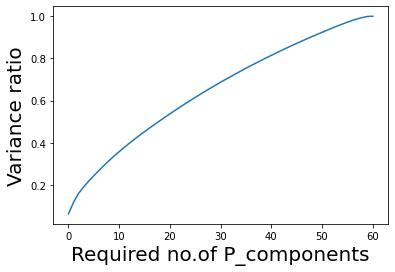

In [118]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [119]:
np.cumsum(pca.explained_variance_ratio_)

array([0.06203471, 0.11667566, 0.15942383, 0.19001738, 0.21772542,
       0.24301513, 0.26782904, 0.29193091, 0.31451189, 0.33651819,
       0.35723438, 0.37770239, 0.39699234, 0.41603271, 0.43460708,
       0.45233303, 0.46958877, 0.48666119, 0.5036222 , 0.52040344,
       0.53677751, 0.5529298 , 0.5688754 , 0.58457564, 0.59991097,
       0.61489056, 0.62975738, 0.64449389, 0.65889455, 0.67295802,
       0.68674405, 0.70034312, 0.71381904, 0.72715994, 0.74026736,
       0.75317537, 0.76594684, 0.77821885, 0.79039294, 0.80252694,
       0.81444426, 0.82617177, 0.83774991, 0.84929659, 0.86037367,
       0.87132235, 0.88211878, 0.89278912, 0.90327035, 0.91358365,
       0.92375035, 0.93381032, 0.9438237 , 0.95346549, 0.96289384,
       0.97187318, 0.98029688, 0.98798169, 0.99420229, 0.99917516,
       1.        ])

In [120]:
# 95 % variance explainability is our objective

np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

8

In [121]:
# Count of variables that could explain 95% of the variance

variables=pca_tfidf.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

53

* <B> From the PCA, even without last 8 variables its possible around 95 % of the variance, we'll drop last 8 columns

In [122]:
# Dropping variables

p_pca_tfidf=pca_tfidf.iloc[:,0:variables]
p_pca_tfidf

,0,1,2,3,4,5,6,7,8,9,...,43,44,45,46,47,48,49,50,51,52
0,-0.020305,-0.016699,-0.015223,-0.003303,-0.015933,0.002396,-0.007386,-0.009454,-0.002839,-0.021891,...,0.000470,-0.002734,-0.004536,0.005383,0.001692,-0.004308,-0.006095,0.004995,-0.006424,-0.010529
1,-0.021481,-0.015700,-0.015664,-0.006462,-0.017744,0.001440,0.001352,0.002063,-0.007900,-0.025967,...,0.070623,-0.048226,-0.006164,-0.100302,-0.056732,0.021019,0.095319,-0.004123,0.048050,0.002881
2,-0.020305,-0.016699,-0.015223,-0.003303,-0.015933,0.002396,-0.007386,-0.009454,-0.002839,-0.021891,...,0.000470,-0.002734,-0.004536,0.005383,0.001692,-0.004308,-0.006095,0.004995,-0.006424,-0.010529
3,-0.041595,0.002159,-0.003121,-0.122760,0.367644,-0.219172,0.038127,-0.165288,-0.044485,0.068713,...,0.028035,0.011942,-0.011333,0.029209,0.026153,0.030746,-0.024642,0.003214,-0.018218,0.007881
4,-0.020305,-0.016699,-0.015223,-0.003303,-0.015933,0.002396,-0.007386,-0.009454,-0.002839,-0.021891,...,0.000470,-0.002734,-0.004536,0.005383,0.001692,-0.004308,-0.006095,0.004995,-0.006424,-0.010529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,-0.032028,-0.025310,-0.025730,-0.032613,-0.045814,-0.042643,-0.157636,0.063378,0.019991,0.164383,...,-0.016752,-0.017930,-0.004831,0.005883,0.040561,-0.016610,0.013049,-0.023709,0.010189,0.032090
3895,-0.036572,-0.030720,-0.023616,-0.031479,-0.050064,-0.085090,0.165941,0.213887,0.051450,0.078373,...,-0.005691,0.107855,-0.009988,-0.065738,0.099361,0.028395,-0.031645,0.129831,0.064935,0.074061
3896,-0.032300,-0.023633,0.004284,-0.021521,-0.048665,-0.005943,-0.036584,0.004889,-0.028240,0.047299,...,0.005824,-0.045374,-0.004936,-0.078677,0.018107,-0.045293,-0.051839,0.019210,-0.028489,0.007535
3897,-0.036169,-0.018416,-0.021160,-0.037323,-0.014504,-0.016825,-0.047864,-0.004517,0.026938,0.014073,...,0.014588,0.163328,0.000846,0.057020,-0.072599,0.048688,0.014019,-0.005637,0.035614,0.010008


In [123]:
p_pca_tfidf.to_csv("PCA_TFIDF.csv",index=False)

In [124]:
p_pca_tfidf = pd.read_csv("PCA_TFIDF.csv")

### Visualizing the word vectors using First 2PCA

In [125]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_tfidf)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])#,index=p_pca_tf.index)

In [126]:
principalDf['Label'] = corpus_train["Labels"]
principalDf

,PC1,PC2,Label
0,-0.020304,-0.016706,1.0
1,-0.021480,-0.015718,0.0
2,-0.020304,-0.016706,0.0
3,-0.041573,0.002217,0.0
4,-0.020304,-0.016706,0.0
...,...,...,...
3894,-0.032021,-0.025289,0.0
3895,-0.036562,-0.030713,0.0
3896,-0.032296,-0.023605,0.0
3897,-0.036139,-0.018416,0.0


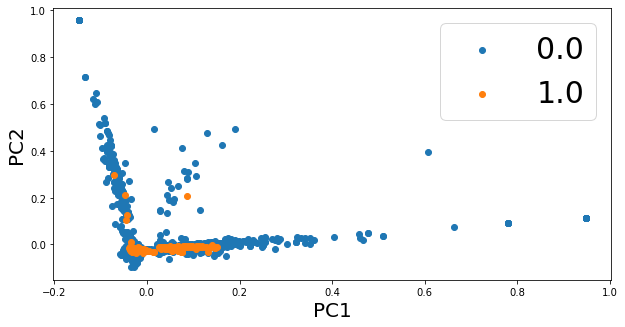

In [127]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(10,5))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


* <b> With 53 PCA variables of TFIDF Vector

In [128]:
X = p_pca_tfidf    
y = corpus_train["Labels"]

In [129]:
#Splitting the data TRAIN TEST

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [130]:
# Intializing objects 

ptfidf_lr_1 = LogisticRegression()                   #logistic regression
ptfidf_rf_1 = RandomForestClassifier()               #random forest
ptfidf_ab_1 = AdaBoostClassifier()                   #adaboost
ptfidf_gb_1 = GradientBoostingClassifier()           #gradientboost
ptfidf_knn_1 = KNeighborsClassifier()                #knn classifier
ptfidf_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
ptfidf_svm_1 = SVC()                                 #support vector machines_classifier

In [131]:
# default model performance on test data
import time
start = time.time()

L = [ptfidf_lr_1,ptfidf_rf_1,ptfidf_ab_1,ptfidf_gb_1,ptfidf_knn_1,ptfidf_ldm_1,ptfidf_svm_1] # List of models

ptfidf_acc_1 = []
ptfidf_f_1 = []
ptfidf_auroc_1 = []
ptfidf_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    ptfidf_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    ptfidf_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    ptfidf_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    ptfidf_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":ptfidf_acc_1,"f1_score":ptfidf_f_1,"auroc":ptfidf_auroc_1,"recall_score":ptfidf_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.11555607716242472 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.874359,0.169492,0.545397,0.095238
RandomForest,0.965385,0.858639,0.887513,0.780952
AdaptiveBoosting,0.953846,0.823529,0.888889,0.800000
Gradient_Boosting,0.966667,0.865979,0.896296,0.800000
KNeighourestNeighbour,0.942308,0.761905,0.833968,0.685714
LinearDiscriminantClassifier,0.896154,0.509091,0.686667,0.400000
SupportVectorclassifier,0.957692,0.827225,0.871005,0.752381


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [285]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

ptfidf_rf_2 = RandomizedSearchCV(estimator=rf_1, param_distributions=params,n_iter=50,cv=5)
ptfidf_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

ptfidf_rf_2.best_params_

timetaken: 1.300672749678294 min


{'class_weight': {0: 1.0, 1: 1}}

#### Model evaluation with best parameters

In [132]:
ptfidf_rf_2 = RandomForestClassifier(class_weight = {0: 1, 1: 1},random_state=42)
ptfidf_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1, 1: 1}, random_state=42)

In [133]:
#Prediction on test data
y_pred = ptfidf_rf_2.predict(X_valid)

In [134]:
#accuracy score
ptfidf_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ptfidf_rf_acc_2)

#f1 score
ptfidf_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ptfidf_rf_f1_2)

#auroc score
ptfidf_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ptfidf_rf_auroc_2)

#recall
ptfidf_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ptfidf_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.967948717948718
F1 Score: 0.8691099476439791
Auroc: 0.8930158730158729
Recall 0.7904761904761904
[[672   3]
 [ 22  83]]


##### <font color= GREEN ><u>GRADIENT BOOSTING

#### Choosing best parameters

In [104]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[8,10,12,14],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,600,100)
       }

#Initializing gradient boosting object
ptfidf_gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
ptfidf_gb_cv = RandomizedSearchCV(gb, param_distributions=grid,n_iter=10,cv = 5) #50fols -320min 
ptfidf_gb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",ptfidf_gb_cv.best_params_)

timetaken: 320.82 min
Best Parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.05}


#### Model evaluation with best parameters

In [135]:
#fitting the model with best parameter
start = time.time()

ptfidf_gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth =12, n_estimators = 500,random_state=42)
ptfidf_gb2.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 0.81 min


In [136]:
#Prediction on validation data
y_pred = ptfidf_gb2.predict(X_valid)

In [137]:
#accuracy score
ptfidf_gb_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ptfidf_gb_acc_2)

#f1 score
ptfidf_gb_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ptfidf_gb_f1_2)

#auroc score
ptfidf_gb_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ptfidf_gb_auroc_2)

#recall
ptfidf_gb_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ptfidf_gb_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.941025641025641
F1 Score: 0.7788461538461539
Auroc: 0.8694179894179893
Recall 0.7714285714285715
[[653  22]
 [ 24  81]]


##### <font color= GREEN ><u>SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [292]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
ptfidf_svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
ptfidf_svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",ptfidf_svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.864 total time=   0.1s
[CV 2/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.1s
[CV 3/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.867 total time=   0.2s
[CV 4/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.865 total time=   0.2s
[CV 5/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.868 total time=   0.2s
[CV 1/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.867 total time=   0.0s
[CV 2/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.0s
[CV 3/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.0s
[CV 4/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.0s
[CV 5/5] END .C=0.01, gamma=0.0001, kernel=poly;, score=0.867 total time=   0.0s
[CV 1/5] END ......C=10, gamma=0.1, kernel=poly;, score=0.867 total time=   0.1s
[CV 2/5] END ......C=10, gamma=0.1, kernel=poly;

#### Model evaluation with best parameters

In [138]:
#fitting the model with best parameter
ptfidf_svc_cv = SVC(kernel = 'rbf', gamma = 1, C = 50)
ptfidf_svc_cv.fit(X_train,y_train)

SVC(C=50, gamma=1)

In [139]:
#Prediction on test data with best parameters
y_pred = ptfidf_svc_cv.predict(X_valid)

In [140]:
#accuracy score
ptfidf_svc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ptfidf_svc_acc_2)

ptfidf_svc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ptfidf_svc_f1_2)

ptfidf_svc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ptfidf_svc_auroc_2)

#recall
ptfidf_svc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ptfidf_svc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.958974358974359
F1 Score: 0.8415841584158417
Auroc: 0.8958730158730159
Recall 0.8095238095238095
[[663  12]
 [ 20  85]]


In [141]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["RandomForest","Gradient_Boosting","SupportVectorclassifier"]

df1 = pd.DataFrame({"Accuracy":ptfidf_acc_1,"F1_score":ptfidf_f_1,"Auroc":ptfidf_auroc_1,"Recall":ptfidf_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[ptfidf_rf_acc_2,ptfidf_gb_acc_2,ptfidf_svc_acc_2],
                    "F1_Score":[ptfidf_rf_f1_2,ptfidf_gb_f1_2,ptfidf_svc_f1_2],
                    "Auroc":[ptfidf_rf_auroc_2,ptfidf_gb_auroc_2,ptfidf_svc_auroc_2],
                   "Recall":[ptfidf_rf_recall_score_2,ptfidf_gb_recall_score_2,ptfidf_svc_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.874359,0.169492,0.545397,0.095238
RandomForest,0.965385,0.858639,0.887513,0.780952
AdaptiveBoosting,0.953846,0.823529,0.888889,0.800000
Gradient_Boosting,0.966667,0.865979,0.896296,0.800000
KNeighourestNeighbour,0.942308,0.761905,0.833968,0.685714
LinearDiscriminantClassifier,0.896154,0.509091,0.686667,0.400000
SupportVectorclassifier,0.957692,0.827225,0.871005,0.752381
,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.967949,0.869110,0.893016,0.790476
Gradient_Boosting,0.941026,0.778846,0.869418,0.771429


##### OBSERVATIONS FROM TFIDF APPROACH:

* <font color= RED><b>ADABOOST model performed the best with Unscaled data with a F1 score of 0.861
* <font color= RED><b>RANDOM FOREST model performed the best with scaled data(PCA) with a F1 score of 0.869

# .................................................................................................................................

### <font color= BLUE>7. DOC2VEC 

In [463]:
corpus_train = pd.read_csv("corpus_train.csv")
corpus_train = corpus_train.dropna(axis=0)

### 1. Embeddings

In [143]:
start = time.time()

embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 1.38 min


### 2. Doc2Vec using genism

In [144]:
corpus_train

,SMS,Labels
0,goal arsenal 4 henry 7 v liverpool 2 henry score simple shot 6 yard pas bergkamp give arsenal 2 goal margin 78 min,1
1,said gon na snow start around 8 9 pm tonite predicting inch accumulation,0
2,aah bless s arm,0
3,oh k come tomorrow,0
4,s happening gotten job begun registration permanent residency,0
...,...,...
3895,good morning pookie pie lol hope wake u,0
3896,take care n get well soon,0
3897,hurry ve weeddeficient like three day,0
3898,grandma oh dear u still ill felt shit morning think hungover another night leave sat,0


In [145]:
wordslist1 = []
for sentence in corpus_train.SMS:
    for word in sentence:
        wordslist1.append(word)

In [146]:
len(wordslist1)

216623

In [147]:
wordslist1 = list(set(wordslist1))

In [148]:
len(wordslist1)

57

In [149]:
word_embeddings = {}
for word in embeddings.index_to_key:
    if word in wordslist1:
        word_embeddings[word] = embeddings[word]

In [150]:
DocVecs1 = []
for sentence in corpus_train.SMS:
    doc_vec_for_each_sent = np.zeros(300)
    for words in sentence:
        if words in word_embeddings.keys():
            doc_vec_for_each_sent = np.add(doc_vec_for_each_sent,
                                          word_embeddings[words])
    #doc_vec_for_each_sent = np.divide(doc_vec_for_each_sent,len(sentence))
    DocVecs1.append(doc_vec_for_each_sent)

In [151]:
X = pd.DataFrame(DocVecs1)
X.shape

(3899, 300)

In [152]:
X.to_csv('docsembedded.csv',index=False)

### <font color= ORANGE> Approach 1 - Using DOC2VEC data 

### Splitting data into train - validation set

In [153]:
X = pd.read_csv('docsembedded.csv')
y = corpus_train["Labels"]

In [154]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [155]:
# Intializing objects 

d2v_lr_1 = LogisticRegression()                   #logistic regression
d2v_rf_1 = RandomForestClassifier()               #random forest
d2v_ab_1 = AdaBoostClassifier()                   #adaboost
d2v_gb_1 = GradientBoostingClassifier()           #gradientboost
d2v_knn_1 = KNeighborsClassifier()                #knn classifier
d2v_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
d2v_svm_1 = SVC()                                 #support vector machines_classifier

In [156]:
# default model performance on validation data
import time
start = time.time()

L = [d2v_lr_1,d2v_rf_1,d2v_ab_1,d2v_gb_1,d2v_knn_1,d2v_ldm_1,d2v_svm_1] # List of models

d2v_acc_1 = []
d2v_f_1 = []
d2v_auroc_1 = []
d2v_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    d2v_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    d2v_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    d2v_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    d2v_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":d2v_acc_1,"f1_score":d2v_f_1,"auroc":d2v_auroc_1,"recall_score":d2v_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.7158603191375732 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.984615,0.940594,0.950899,0.904762
RandomForest,0.987179,0.951456,0.964444,0.933333
AdaptiveBoosting,0.983333,0.936585,0.954180,0.914286
Gradient_Boosting,0.983333,0.937198,0.958201,0.923810
KNeighourestNeighbour,0.979487,0.920792,0.939894,0.885714
LinearDiscriminantClassifier,0.983333,0.935323,0.946138,0.895238
SupportVectorclassifier,0.987179,0.950495,0.956402,0.914286


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [356]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

d2v_rf_2 = RandomizedSearchCV(estimator=d2v_rf_1, param_distributions=params,n_iter=50,cv=5)
d2v_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

d2v_rf_2.best_params_

timetaken: 5.170265591144561 min


{'class_weight': {0: 4.0, 1: 1}}

#### Model evaluation with best parameters

In [157]:
d2v_rf_2 = RandomForestClassifier(class_weight = {0: 4, 1: 1},random_state=42)
d2v_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 4, 1: 1}, random_state=42)

In [158]:
#Prediction on test data
y_pred = d2v_rf_2.predict(X_valid)

In [159]:
#accuracy score
d2v_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",d2v_rf_acc_2)

#f1 score
d2v_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",d2v_rf_f1_2)

#auroc score
d2v_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",d2v_rf_auroc_2)

#recall
d2v_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",d2v_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.985897435897436
F1 Score: 0.9468599033816426
Auroc: 0.9637037037037037
Recall 0.9333333333333333
[[671   4]
 [  7  98]]


##### <font color= GREEN ><u>ADAPTIVE BOOSTING

#### Choosing best parameters

In [360]:
#Finding best parameter for Adaboost model

start = time.time()

# Hyper parameters range intialization for tuning  (base_estimator will be decision tree)
param_grid = {
    'n_estimators': range(120, 170, 5),
     }

#Gridsearch on different combination of parameter
d2v_ab_2 = RandomizedSearchCV(estimator=d2v_ab_1, param_distributions=param_grid,n_iter=10,cv= 5)
d2v_ab_2.fit(X_train,y_train) 

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min")

#Best parameters
d2v_ab_2.best_params_


KeyboardInterrupt



#### Model evaluation with best parameters

In [160]:
d2v_ab_2 = AdaBoostClassifier(n_estimators = 120,random_state=42)
d2v_ab_2.fit(X_train,y_train)

AdaBoostClassifier(n_estimators=120, random_state=42)

In [161]:
#Prediction on validation data
y_pred = d2v_ab_2.predict(X_valid)

In [162]:
#accuracy score
d2v_ab_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",d2v_ab_acc_2)

#f1 score
d2v_ab_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",d2v_ab_f1_2)

#auroc score
d2v_ab_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",d2v_ab_auroc_2)

#recall
d2v_ab_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",d2v_ab_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9846153846153847
F1 Score: 0.941747572815534
Auroc: 0.9589417989417991
Recall 0.9238095238095239
[[671   4]
 [  8  97]]


##### <font color= GREEN ><u>GRADIENT BOOSTING

#### Choosing best parameters

In [ ]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[8,10,12,14],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,600,100)
       }

#Initializing gradient boosting object
d2v_gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
d2v_gb_cv = RandomizedSearchCV(gb, param_distributions=grid,n_iter=10,cv = 5) #50fols -320min 
d2v_gb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",d2v_gb_cv.best_params_)

#### Model evaluation with best parameters

In [163]:
#fitting the model with best parameter
start = time.time()

d2v_gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth =12, n_estimators = 400,random_state=42)
d2v_gb2.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 5.95 min


In [164]:
#Prediction on validation data
y_pred = d2v_gb2.predict(X_valid)

In [165]:
#accuracy score
d2v_gb_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",d2v_gb_acc_2)

#f1 score
d2v_gb_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",d2v_gb_f1_2)

#auroc score
d2v_gb_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",d2v_gb_auroc_2)

#recall
d2v_gb_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",d2v_gb_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9641025641025641
F1 Score: 0.8703703703703703
Auroc: 0.935026455026455
Recall 0.8952380952380953
[[658  17]
 [ 11  94]]


In [166]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["RandomForest","AdaptiveBoosting","Gradient_Boosting"]

df1 = pd.DataFrame({"Accuracy":d2v_acc_1,"F1_score":d2v_f_1,"Auroc":d2v_auroc_1,"Recall":d2v_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[d2v_rf_acc_2,d2v_ab_acc_2,d2v_gb_acc_2],
                    "F1_Score":[d2v_rf_f1_2,d2v_ab_f1_2,d2v_gb_f1_2],
                    "Auroc":[d2v_rf_auroc_2,d2v_ab_auroc_2,d2v_gb_auroc_2],
                   "Recall":[d2v_rf_recall_score_2,d2v_ab_recall_score_2,d2v_gb_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.984615,0.940594,0.950899,0.904762
RandomForest,0.987179,0.951456,0.964444,0.933333
AdaptiveBoosting,0.983333,0.936585,0.954180,0.914286
Gradient_Boosting,0.983333,0.937198,0.958201,0.923810
KNeighourestNeighbour,0.979487,0.920792,0.939894,0.885714
LinearDiscriminantClassifier,0.983333,0.935323,0.946138,0.895238
SupportVectorclassifier,0.987179,0.950495,0.956402,0.914286
,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.985897,0.946860,0.963704,0.933333
AdaptiveBoosting,0.984615,0.941748,0.958942,0.923810


### <font color= ORANGE>Approach 2 - Principal Component Analysis

* PCA on the above unscaled doc2vec data

In [167]:
X = pd.read_csv('docsembedded.csv')
y = corpus_train["Labels"]

In [168]:
print(X.shape)
print(y.shape)

(3899, 300)
(3899,)


In [169]:
# Applying PCA

from sklearn.decomposition import PCA

pca=PCA()
pca_comp=pca.fit_transform(X)
p_d2v=pd.DataFrame(pca_comp)
p_d2v

,0,1,2,3,4,5,6,7,8,9,...,290,291,292,293,294,295,296,297,298,299
0,62.719519,-4.297449,-4.446298,9.023194,-0.408504,-3.858697,5.447959,-4.872034,-1.292221,-8.627582,...,-1.134833e-16,5.162347e-16,-1.559082e-15,-1.350219e-15,2.440835e-16,1.056371e-15,1.119994e-15,-3.088540e-16,-6.949036e-17,2.276399e-15
1,23.064256,1.674814,13.973935,-1.215162,2.638680,-1.420991,-2.299827,-2.996010,-1.212666,-0.461215,...,-2.379488e-15,-4.307482e-15,-5.881601e-15,2.402726e-16,1.526005e-15,3.374479e-15,2.637692e-16,-3.627748e-15,6.979666e-15,-5.572447e-15
2,-55.031525,-1.385121,-1.581057,-1.235001,0.813807,0.888474,-0.546199,-0.907109,-2.797870,-2.871484,...,1.218335e-14,4.519725e-15,4.537667e-16,-8.359296e-15,-4.111534e-15,-1.749839e-15,1.196985e-14,-1.498299e-17,-6.295848e-16,-1.969307e-15
3,-42.274921,0.337503,1.109508,0.023709,-3.333810,-1.184059,3.175027,2.943593,-0.651345,-1.581141,...,-9.917732e-17,2.966124e-15,3.412638e-15,-3.869992e-16,7.831007e-16,4.393503e-16,-2.433762e-15,-6.170551e-15,-4.043708e-15,4.838234e-15
4,19.577614,8.666612,-2.762601,-3.136331,2.257744,-0.934425,2.746582,-3.149991,2.630537,-2.980412,...,-3.522518e-15,-1.317346e-15,2.877737e-15,-7.883670e-16,-5.342121e-15,-3.176888e-15,2.365440e-15,4.565627e-15,-8.289114e-16,2.325547e-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3894,-13.915829,2.524318,-1.240054,4.908599,-5.620187,-1.047075,4.260323,0.320067,3.406365,-2.205006,...,2.956505e-15,-1.242595e-15,-1.487087e-15,-1.545517e-16,-1.215836e-16,-6.678742e-16,3.746018e-15,3.969053e-15,1.536119e-16,5.629379e-15
3895,-38.348143,1.754974,-4.671170,-0.810324,-3.371434,-0.328078,1.891295,0.838789,-1.709084,2.094913,...,-4.277976e-15,-3.711548e-15,2.526882e-15,-5.215895e-15,2.692993e-15,-2.584630e-16,-6.128255e-16,-1.871383e-16,-1.042247e-15,-1.006540e-15
3896,-12.588533,5.496112,-10.946917,1.227007,1.460259,2.006614,-4.264040,-0.704141,3.873698,3.700269,...,-5.439095e-16,-2.410428e-15,7.794129e-16,4.274261e-15,1.666227e-15,-1.376195e-15,1.666603e-15,-4.203471e-15,-1.801797e-15,-1.322463e-15
3897,41.552195,10.111707,7.859152,-0.833726,0.289152,-5.850093,-3.799662,0.099798,0.737331,2.532538,...,-3.835179e-15,3.772379e-16,-3.434282e-15,9.430074e-15,8.399755e-15,1.765624e-15,3.742265e-15,2.993633e-15,-7.439870e-15,5.546452e-15


In [170]:
p_d2v.shape

(3899, 300)

### Variance Proportion

In [171]:
pca.explained_variance_ratio_

array([8.98295324e-01, 4.11245083e-02, 1.25903862e-02, 6.33834061e-03,
       5.06419374e-03, 4.21347529e-03, 3.82367812e-03, 3.25991040e-03,
       3.04825104e-03, 2.91090663e-03, 2.50401247e-03, 2.15035388e-03,
       1.96712913e-03, 1.74514176e-03, 1.67319421e-03, 1.54849486e-03,
       1.34474368e-03, 1.24022654e-03, 1.10390354e-03, 8.91861384e-04,
       8.30999337e-04, 6.54899051e-04, 4.99218678e-04, 2.94444059e-04,
       2.09971935e-04, 1.72390352e-04, 1.16677855e-04, 1.03273541e-04,
       7.83163652e-05, 5.11285040e-05, 4.06406236e-05, 2.25734494e-05,
       1.95509877e-05, 1.66258886e-05, 1.28457333e-05, 9.67049615e-06,
       8.45313706e-06, 7.49098379e-06, 6.68942822e-06, 2.53659334e-06,
       9.97466771e-07, 5.71484618e-07, 4.90602339e-07, 4.34781784e-07,
       3.88249191e-07, 3.07261071e-07, 2.59598671e-07, 1.17420761e-07,
       9.05340768e-33, 8.12705875e-33, 8.12705875e-33, 8.12705875e-33,
       8.12705875e-33, 8.12705875e-33, 8.12705875e-33, 8.12705875e-33,
      

Text(0, 0.5, 'Variance ratio')

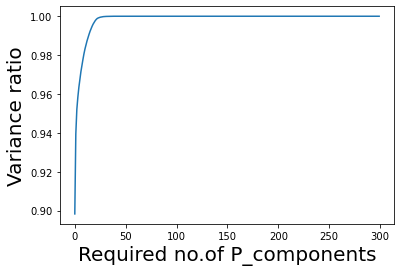

In [172]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [173]:
np.cumsum(pca.explained_variance_ratio_)

array([0.89829532, 0.93941983, 0.95201022, 0.95834856, 0.96341275,
       0.96762623, 0.97144991, 0.97470982, 0.97775807, 0.98066897,
       0.98317299, 0.98532334, 0.98729047, 0.98903561, 0.99070881,
       0.9922573 , 0.99360204, 0.99484227, 0.99594617, 0.99683804,
       0.99766904, 0.99832393, 0.99882315, 0.9991176 , 0.99932757,
       0.99949996, 0.99961664, 0.99971991, 0.99979823, 0.99984936,
       0.99989   , 0.99991257, 0.99993212, 0.99994875, 0.99996159,
       0.99997126, 0.99997972, 0.99998721, 0.9999939 , 0.99999643,
       0.99999743, 0.999998  , 0.99999849, 0.99999893, 0.99999932,
       0.99999962, 0.99999988, 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.        ,
       1.        , 1.        , 1.        , 1.        , 1.     

In [174]:
# 95 % variance explainability is our objective

np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

298

In [175]:
# Count of variables that could explain 95% of the variance

variables=p_d2v.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

2

* <B> From the PCA, even without 298 variables its possible around 95 % of the variance can be explained, we'll drop last 298 columns

In [176]:
# Dropping variables

p_pca_d2v=p_d2v.iloc[:,0:variables]
p_pca_d2v

,0,1
0,62.719519,-4.297449
1,23.064256,1.674814
2,-55.031525,-1.385121
3,-42.274921,0.337503
4,19.577614,8.666612
...,...,...
3894,-13.915829,2.524318
3895,-38.348143,1.754974
3896,-12.588533,5.496112
3897,41.552195,10.111707


In [177]:
p_pca_d2v.to_csv("PCA_d2v.csv",index=False)

In [178]:
p_pca_d2v = pd.read_csv("PCA_d2v.csv")

### Visualizing the word vectors using First 2PCA

In [179]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_d2v)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])#,index=p_pca_tf.index)

In [180]:
principalDf['Label'] = corpus_train["Labels"]
principalDf

,PC1,PC2,Label
0,62.719519,-4.297449,1.0
1,23.064256,1.674814,0.0
2,-55.031525,-1.385121,0.0
3,-42.274921,0.337503,0.0
4,19.577614,8.666612,0.0
...,...,...,...
3894,-13.915829,2.524318,0.0
3895,-38.348143,1.754974,0.0
3896,-12.588533,5.496112,0.0
3897,41.552195,10.111707,0.0


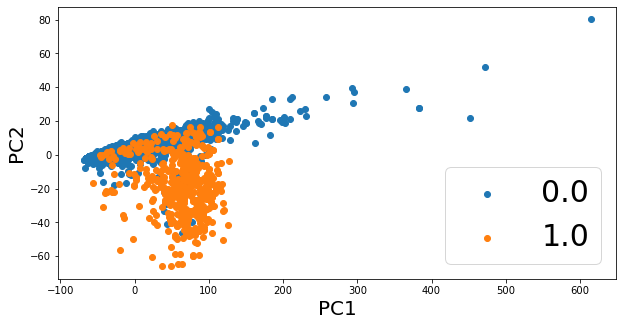

In [181]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(10,5))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


* <b> With 2 PCA variables of Doc2Vec 

In [182]:
X = p_pca_d2v    
y = corpus_train["Labels"]

In [183]:
#Splitting the data Train valid

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [184]:
# Intializing objects 

pd2v_lr_1 = LogisticRegression()                   #logistic regression
pd2v_rf_1 = RandomForestClassifier()               #random forest
pd2v_ab_1 = AdaBoostClassifier()                   #adaboost
pd2v_gb_1 = GradientBoostingClassifier()           #gradientboost
pd2v_knn_1 = KNeighborsClassifier()                #knn classifier
pd2v_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
pd2v_svm_1 = SVC()                                 #support vector machines_classifier

In [185]:
# default model performance on test data
import time
start = time.time()

L = [pd2v_lr_1,pd2v_rf_1,pd2v_ab_1,pd2v_gb_1,pd2v_knn_1,pd2v_ldm_1,pd2v_svm_1] # List of models

pd2v_acc_1 = []
pd2v_f_1 = []
pd2v_auroc_1 = []
pd2v_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    pd2v_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    pd2v_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    pd2v_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    pd2v_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":pd2v_acc_1,"f1_score":pd2v_f_1,"auroc":pd2v_auroc_1,"recall_score":pd2v_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.023932492733001708 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.979487,0.923077,0.951958,0.914286
RandomForest,0.975641,0.910798,0.953757,0.923810
AdaptiveBoosting,0.979487,0.920792,0.939894,0.885714
Gradient_Boosting,0.980769,0.928910,0.960741,0.933333
KNeighourestNeighbour,0.975641,0.909091,0.945714,0.904762
LinearDiscriminantClassifier,0.976923,0.907216,0.918307,0.838095
SupportVectorclassifier,0.983333,0.935961,0.950159,0.904762


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [429]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

pd2v_rf_2 = RandomizedSearchCV(estimator=pd2v_rf_1, param_distributions=params,n_iter=50,cv=5)
pd2v_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

pd2v_rf_2.best_params_

timetaken: 0.5010467489560445 min


{'class_weight': {0: 1.75, 1: 1}}

#### Model evaluation with best parameters

In [186]:
pd2v_rf_2 = RandomForestClassifier(class_weight = {0: 1.75, 1: 1},random_state=42)
pd2v_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1.75, 1: 1}, random_state=42)

In [187]:
#Prediction on test data
y_pred = pd2v_rf_2.predict(X_valid)

In [188]:
#accuracy score
pd2v_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",pd2v_rf_acc_2)

#f1 score
pd2v_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",pd2v_rf_f1_2)

#auroc score
pd2v_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",pd2v_rf_auroc_2)

#recall
pd2v_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",pd2v_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9782051282051282
F1 Score: 0.9194312796208531
Auroc: 0.9552380952380952
Recall 0.9238095238095239
[[666   9]
 [  8  97]]


##### <font color= GREEN ><u>GRADIENT BOOSTING

#### Choosing best parameters

In [104]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[8,10,12,14],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,600,100)
       }

#Initializing gradient boosting object
pd2v_gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
pd2v_gb_cv = RandomizedSearchCV(gb, param_distributions=grid,n_iter=10,cv = 5) #50fols -320min 
pd2v_gb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",pd2v_gb_cv.best_params_)

timetaken: 320.82 min
Best Parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.05}


#### Model evaluation with best parameters

In [189]:
#fitting the model with best parameter
start = time.time()

pd2v_gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth =12, n_estimators = 500,random_state=42)
pd2v_gb2.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 0.12 min


In [190]:
#Prediction on validation data
y_pred = pd2v_gb2.predict(X_valid)

In [191]:
#accuracy score
pd2v_gb_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",pd2v_gb_acc_2)

#f1 score
pd2v_gb_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",pd2v_gb_f1_2)

#auroc score
pd2v_gb_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",pd2v_gb_auroc_2)

#recall
pd2v_gb_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",pd2v_gb_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9756410256410256
F1 Score: 0.9107981220657277
Auroc: 0.9537566137566138
Recall 0.9238095238095239
[[664  11]
 [  8  97]]


##### <font color= GREEN ><u>SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [ ]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
pd2v_svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
pd2v_svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",pd2v_svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.966 total time=   0.3s
[CV 2/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.973 total time=   0.2s
[CV 3/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.2s
[CV 4/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.962 total time=   0.3s
[CV 5/5] END ......C=1.0, gamma=0.1, kernel=rbf;, score=0.960 total time=   0.2s


#### Model evaluation with best parameters

In [192]:
#fitting the model with best parameter
pd2v_svc_cv = SVC(kernel = 'rbf', gamma = 1, C = 50)
pd2v_svc_cv.fit(X_train,y_train)

SVC(C=50, gamma=1)

In [193]:
#Prediction on test data with best parameters
y_pred = pd2v_svc_cv.predict(X_valid)

In [194]:
#accuracy score
pd2v_svc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",pd2v_svc_acc_2)

pd2v_svc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",pd2v_svc_f1_2)

pd2v_svc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",pd2v_svc_auroc_2)

#recall
pd2v_svc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",pd2v_svc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9012820512820513
F1 Score: 0.49673202614379086
Auroc: 0.6735449735449736
Recall 0.3619047619047619
[[665  10]
 [ 67  38]]


In [195]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["RandomForest","Gradient_Boosting","SupportVectorclassifier"]

df1 = pd.DataFrame({"Accuracy":pd2v_acc_1,"F1_score":pd2v_f_1,"Auroc":pd2v_auroc_1,"Recall":pd2v_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[pd2v_rf_acc_2,pd2v_gb_acc_2,pd2v_svc_acc_2],
                    "F1_Score":[pd2v_rf_f1_2,pd2v_gb_f1_2,pd2v_svc_f1_2],
                    "Auroc":[pd2v_rf_auroc_2,pd2v_gb_auroc_2,pd2v_svc_auroc_2],
                   "Recall":[pd2v_rf_recall_score_2,pd2v_gb_recall_score_2,pd2v_svc_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.979487,0.923077,0.951958,0.914286
RandomForest,0.975641,0.910798,0.953757,0.923810
AdaptiveBoosting,0.979487,0.920792,0.939894,0.885714
Gradient_Boosting,0.980769,0.928910,0.960741,0.933333
KNeighourestNeighbour,0.975641,0.909091,0.945714,0.904762
LinearDiscriminantClassifier,0.976923,0.907216,0.918307,0.838095
SupportVectorclassifier,0.983333,0.935961,0.950159,0.904762
,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.978205,0.919431,0.955238,0.923810
Gradient_Boosting,0.975641,0.910798,0.953757,0.923810


##### OBSERVATIONS FROM DOC2VEC APPROACH:

* <font color= RED><b>Random forest model performed the best with Unscaled data with a F1 score of 0.946
* <font color= RED><b>Random forest model performed the best with scaled data(PCA-with 2components) with a F1 score of 0.919

# .................................................................................................................................

### <font color= BLUE>8. HEIURISTIC METHOD

### <font color= ORANGE>Approach 1 - Trigger words as binary variables

In [336]:
corpus_train = pd.read_csv("corpus_train.csv")

In [337]:
corpus_train.drop("Labels",axis=1,inplace=True)

In [338]:
spam_words = pd.read_csv("triggerwords.csv")
spam_words.head()

,Spam words
0,growth
1,turned
2,terms
3,human
4,catch


In [339]:
spam_words = pd.read_csv("triggerwords.csv")

list_spam = []

for i in spam_words["Spam words"]:
    list_spam.append(i)


In [340]:
for i in range(len(list_spam)):
    
    corpus_train[list_spam[i]] = 0

    for j in range(len(corpus_train)):
        
        if list_spam[i] in str(corpus_train["SMS"][j]):

            corpus_train.iloc[j,i+1] = 1

        else:

            corpus_train.iloc[j,i+1] = 0

In [347]:
corpus_train.to_csv("dtm_heuristic.csv",index=False)

In [352]:
h_corpus_train = pd.read_csv("dtm_heuristic.csv")
corpus_train = pd.read_csv("corpus_train.csv")
h_corpus_train["Labels"] = corpus_train["Labels"]

In [353]:
h_corpus_train

,SMS,growth,turned,terms,human,catch,congratulations,meds,incredible,copy,...,increase,buy,initial,xanax,special,scam,bulk,car,baldness,Labels
0,goal arsenal 4 henry 7 v liverpool 2 henry score simple shot 6 yard pas bergkamp give arsenal 2 goal margin 78 min,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,said gon na snow start around 8 9 pm tonite predicting inch accumulation,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,aah bless s arm,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,oh k come tomorrow,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,s happening gotten job begun registration permanent residency,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,good morning pookie pie lol hope wake u,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3896,take care n get well soon,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3897,hurry ve weeddeficient like three day,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3898,grandma oh dear u still ill felt shit morning think hungover another night leave sat,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Splitting data into train - validation set

In [354]:
X = h_corpus_train.drop(["Labels","SMS"],axis=1)
y = h_corpus_train["Labels"]

In [357]:
from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [358]:
# Intializing objects 

h_lr_1 = LogisticRegression()                   #logistic regression
h_rf_1 = RandomForestClassifier()               #random forest
h_ab_1 = AdaBoostClassifier()                   #adaboost
h_gb_1 = GradientBoostingClassifier()           #gradientboost
h_knn_1 = KNeighborsClassifier()                #knn classifier
h_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
h_svm_1 = SVC()                                 #support vector machines_classifier

In [359]:
# default model performance on test data
import time
start = time.time()

L = [h_lr_1,h_rf_1,h_ab_1,h_gb_1,h_knn_1,h_ldm_1,h_svm_1] 

h_acc_1 = []
h_f_1 = []
h_auroc_1 = []
h_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    h_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    h_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    h_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    h_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":h_acc_1,"f1_score":h_f_1,"auroc":h_auroc_1,"recall_score":h_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.11532335678736369 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.971795,0.893204,0.931429,0.876190
RandomForest,0.979487,0.921569,0.943915,0.895238
AdaptiveBoosting,0.971795,0.895238,0.939471,0.895238
Gradient_Boosting,0.974359,0.903846,0.940952,0.895238
KNeighourestNeighbour,0.952564,0.788571,0.827831,0.657143
LinearDiscriminantClassifier,0.974359,0.904762,0.944974,0.904762
SupportVectorclassifier,0.978205,0.917073,0.943175,0.895238


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>RANDOM FOREST

#### Choosing best parameters

In [362]:
start = time.time()

params = {'class_weight':[{0:neg_weight, 1:1} for neg_weight in np.arange(1.0, 5.0, 0.25)]}

h_rf_2 = RandomizedSearchCV(estimator=h_rf_1, param_distributions=params,n_iter=50,cv=5)
h_rf_2.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

h_rf_2.best_params_

timetaken: 1.3975544333457948 min


{'class_weight': {0: 3.25, 1: 1}}

#### Model evaluation with best parameters

In [384]:
h_rf_2 = RandomForestClassifier(class_weight = {0: 1.75, 1: 1},random_state=42)
h_rf_2.fit(X_train,y_train) 

RandomForestClassifier(class_weight={0: 1.75, 1: 1}, random_state=42)

In [385]:
#Prediction on test data
y_pred = h_rf_2.predict(X_valid)

In [386]:
#accuracy score
h_rf_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",h_rf_acc_2)

#f1 score
h_rf_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",h_rf_f1_2)

#auroc score
h_rf_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",h_rf_auroc_2)

#recall
h_rf_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",h_rf_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9782051282051282
F1 Score: 0.916256157635468
Auroc: 0.9391534391534392
Recall 0.8857142857142857
[[670   5]
 [ 12  93]]


##### <font color= GREEN ><u>LINEAR DISCRIMINANT CLASSIFIER

#### Choosing best parameters

In [395]:
start = time.time()

# define model
model = h_ldm_1

# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

# define grid
grid = dict()
grid['solver'] = ['svd', 'lsqr', 'eigen']

# define search
h_ldc = GridSearchCV(model, grid, scoring='f1', cv=cv, n_jobs=-1)

results = h_ldc.fit(X_train, y_train)

end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

print(results.best_params_)

timetaken: 0.612308390935262 min
{'solver': 'svd'}


#### Model evaluation with best parameters

In [387]:
h_ldc_2 = LinearDiscriminantAnalysis(solver = 'svd')
h_ldc_2.fit(X_train,y_train) 

LinearDiscriminantAnalysis()

In [388]:
#Prediction on test data
y_pred = h_ldc_2.predict(X_valid)

In [389]:
#accuracy score
h_ldc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",h_ldc_acc_2)

#f1 score
h_ldc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",h_ldc_f1_2)

#auroc score
h_ldc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",h_ldc_auroc_2)

#recall
h_ldc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",h_ldc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9743589743589743
F1 Score: 0.9047619047619048
Auroc: 0.9449735449735449
Recall 0.9047619047619048
[[665  10]
 [ 10  95]]


##### <font color= GREEN ><u>SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [377]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
h_svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
h_svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",h_svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END C=1.0, gamma=0.0001, kernel=sigmoid;, score=0.867 total time=   0.7s
[CV 2/5] END C=1.0, gamma=0.0001, kernel=sigmoid;, score=0.867 total time=   0.6s
[CV 3/5] END C=1.0, gamma=0.0001, kernel=sigmoid;, score=0.865 total time=   0.5s
[CV 4/5] END C=1.0, gamma=0.0001, kernel=sigmoid;, score=0.865 total time=   0.5s
[CV 5/5] END C=1.0, gamma=0.0001, kernel=sigmoid;, score=0.865 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.867 total time=   0.5s
[CV 2/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.867 total time=   0.5s
[CV 3/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.865 total time=   0.6s
[CV 4/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.865 total time=   0.6s
[CV 5/5] END ...C=0.1, gamma=0.001, kernel=poly;, score=0.865 total time=   0.5s
[CV 1/5] END ...C=1.0, gamma=0.001, kernel=poly;, score=0.867 total time=   0.5s
[CV 2/5] END ...C=1.0, gamma=0.001, kernel=

#### Model evaluation with best parameters

In [390]:
#fitting the model with best parameter
h_svc_cv = SVC(kernel = 'rbf', gamma = 0.0001, C = 50)
h_svc_cv.fit(X_train,y_train)

SVC(C=50, gamma=0.0001)

In [391]:
#Prediction on test data with best parameters
y_pred = h_svc_cv.predict(X_valid)

In [392]:
#accuracy score
h_svc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",h_svc_acc_2)

h_svc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",h_svc_f1_2)

h_svc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",h_svc_auroc_2)

#recall
h_svc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",h_svc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9705128205128205
F1 Score: 0.888888888888889
Auroc: 0.9306878306878307
Recall 0.8761904761904762
[[665  10]
 [ 13  92]]


In [393]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["RandomForest","LinearDiscriminantClassifier","SupportVectorclassifier"]

df1 = pd.DataFrame({"Accuracy":h_acc_1,"F1_score":h_f_1,"Auroc":h_auroc_1,"Recall":h_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[h_rf_acc_2,h_ldc_acc_2,h_svc_acc_2],
                    "F1_Score":[h_rf_f1_2,h_ldc_f1_2,h_svc_f1_2],
                    "Auroc":[h_rf_auroc_2,h_ldc_auroc_2,h_svc_auroc_2],
                   "Recall":[h_rf_recall_score_2,h_ldc_recall_score_2,h_svc_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.971795,0.893204,0.931429,0.876190
RandomForest,0.979487,0.921569,0.943915,0.895238
AdaptiveBoosting,0.971795,0.895238,0.939471,0.895238
Gradient_Boosting,0.974359,0.903846,0.940952,0.895238
KNeighourestNeighbour,0.952564,0.788571,0.827831,0.657143
LinearDiscriminantClassifier,0.974359,0.904762,0.944974,0.904762
SupportVectorclassifier,0.978205,0.917073,0.943175,0.895238
,Accuracy,F1_Score,Auroc,Recall
RandomForest,0.978205,0.916256,0.939153,0.885714
LinearDiscriminantClassifier,0.974359,0.904762,0.944974,0.904762


### <font color= ORANGE>Approach 2 - Principal Component Analysis

* PCA on the above unscaled Heuiristic features data

In [415]:
x = pd.read_csv("dtm_heuristic.csv")
X = x.drop("SMS",axis=1)
y = corpus_train["Labels"]

In [416]:
print(X.shape)
print(y.shape)

(3900, 400)
(3900,)


In [417]:
# Applying PCA

from sklearn.decomposition import PCA

pca=PCA()
pca_comp=pca.fit_transform(X)
p_h=pd.DataFrame(pca_comp)
p_h

,0,1,2,3,4,5,6,7,8,9,...,390,391,392,393,394,395,396,397,398,399
0,-0.075222,-0.268531,-0.623870,0.303276,0.068825,0.252170,-0.602400,0.454630,-0.058263,0.029307,...,-0.000000e+00,0.000000e+00,0.000000e+00,-0.000000e+00,0.000000e+00,-0.000000e+00,1.538619e-15,0.000000e+00,-0.000000e+00,-0.000000e+00
1,0.642096,-0.715928,-0.093971,0.280450,-0.312082,-0.578617,0.591581,-0.197498,-0.060847,0.901157,...,-8.540090e-18,2.536944e-19,-9.099446e-18,1.738455e-17,-8.830570e-18,-7.433409e-18,3.998482e-18,7.504162e-18,5.583520e-18,3.612334e-20
2,-0.854155,0.290235,0.151729,-0.022763,0.000881,-0.011699,0.037357,-0.012547,0.000860,-0.008149,...,-1.312239e-20,-8.975054e-19,3.139621e-19,-8.949199e-19,-2.054609e-18,-1.023422e-18,4.530908e-19,-2.384572e-19,9.047659e-19,6.098869e-20
3,-0.570055,0.158078,0.046667,1.074586,0.304465,0.602403,-0.058821,-0.347676,-0.017916,-0.132518,...,-1.133024e-16,-1.824032e-17,-2.242375e-17,-9.021638e-18,-3.461017e-18,1.635410e-17,1.569028e-18,1.717498e-17,-9.653573e-18,3.733500e-18
4,0.577345,-0.767963,0.072129,-0.567994,0.244717,-0.553613,0.367537,0.149914,-0.124006,-0.556941,...,-2.419604e-17,-1.232711e-17,-1.139345e-17,-5.670941e-18,3.825184e-19,-4.374464e-17,-1.368084e-17,6.037175e-17,6.732771e-17,5.933632e-17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.303597,-0.301244,-0.633154,0.383167,-0.021493,0.189438,-0.503693,-0.282951,0.029012,-0.170428,...,-1.739401e-20,2.319759e-19,3.025237e-18,1.095840e-18,-2.605809e-18,-1.791214e-18,-8.680231e-19,-4.834434e-19,-1.617222e-18,-1.324745e-18
3896,-0.299511,-0.179008,0.846721,0.122672,-0.387637,-0.142096,0.199999,0.247309,0.204722,0.081453,...,1.044344e-17,2.179862e-18,1.873598e-18,2.775107e-19,2.972931e-18,4.243049e-18,2.044614e-18,-1.013182e-17,-9.335247e-19,5.471800e-19
3897,-0.684602,0.184038,0.146095,0.066695,0.063259,0.215990,0.367379,0.353868,-0.100007,0.216432,...,8.422798e-17,2.342852e-17,1.622073e-17,-5.098150e-18,-6.146682e-19,-5.822745e-18,1.442360e-19,-1.038890e-17,-2.172871e-17,5.349006e-19
3898,0.526685,-0.798658,-0.744086,-0.353912,0.929244,-0.227834,-0.252589,-0.491495,0.546882,0.713030,...,-7.084629e-18,-5.244770e-18,3.317622e-18,1.953651e-18,1.152119e-18,-2.943527e-18,-2.240749e-18,-1.040246e-17,-5.728354e-18,-5.587758e-19


In [418]:
p_h.shape

(3900, 400)

### Variance Proportion

In [419]:
pca.explained_variance_ratio_

array([9.88237386e-02, 5.16427009e-02, 4.53381682e-02, 4.29784197e-02,
       4.06747710e-02, 3.84613912e-02, 3.26370080e-02, 2.99920817e-02,
       2.69572946e-02, 2.63377676e-02, 2.44804458e-02, 2.32344217e-02,
       2.23498320e-02, 2.13137161e-02, 2.05744177e-02, 1.87648000e-02,
       1.82388797e-02, 1.62986372e-02, 1.55916464e-02, 1.40492015e-02,
       1.26394714e-02, 1.22594138e-02, 1.12255172e-02, 1.00184970e-02,
       9.55765069e-03, 9.40132121e-03, 8.83965091e-03, 8.46615131e-03,
       8.21262381e-03, 7.90741839e-03, 7.55844002e-03, 7.25883958e-03,
       6.89947599e-03, 6.45694120e-03, 6.43035937e-03, 6.09225741e-03,
       5.99645252e-03, 5.71295969e-03, 5.61874279e-03, 5.33879220e-03,
       5.29414994e-03, 5.27652297e-03, 4.94741199e-03, 4.85942983e-03,
       4.74896317e-03, 4.62856757e-03, 4.44591937e-03, 4.36567096e-03,
       4.24020710e-03, 4.11351503e-03, 4.07141417e-03, 3.93142946e-03,
       3.81865777e-03, 3.73039514e-03, 3.70592381e-03, 3.61683145e-03,
      

Text(0, 0.5, 'Variance ratio')

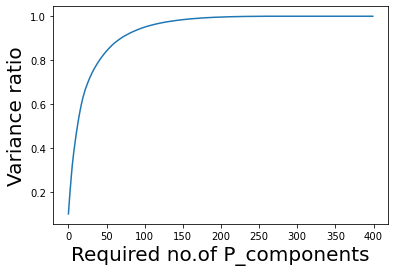

In [420]:
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Required no.of P_components",fontsize=20)
plt.ylabel("Variance ratio",fontsize=20)

In [421]:
np.cumsum(pca.explained_variance_ratio_)

array([0.09882374, 0.15046644, 0.19580461, 0.23878303, 0.2794578 ,
       0.31791919, 0.3505562 , 0.38054828, 0.40750557, 0.43384334,
       0.45832379, 0.48155821, 0.50390804, 0.52522176, 0.54579617,
       0.56456097, 0.58279985, 0.59909849, 0.61469014, 0.62873934,
       0.64137881, 0.65363822, 0.66486374, 0.67488224, 0.68443989,
       0.69384121, 0.70268086, 0.71114701, 0.71935964, 0.72726706,
       0.7348255 , 0.74208434, 0.74898381, 0.75544075, 0.76187111,
       0.76796337, 0.77395982, 0.77967278, 0.78529152, 0.79063032,
       0.79592447, 0.80120099, 0.8061484 , 0.81100783, 0.81575679,
       0.82038536, 0.82483128, 0.82919695, 0.83343716, 0.83755067,
       0.84162209, 0.84555352, 0.84937218, 0.85310257, 0.85680849,
       0.86042533, 0.8639647 , 0.86739447, 0.87064077, 0.87378107,
       0.87674943, 0.87966453, 0.88242549, 0.88514277, 0.88779549,
       0.89035705, 0.8928657 , 0.89535827, 0.89780928, 0.90020163,
       0.90254444, 0.90482069, 0.90700544, 0.90902797, 0.91101

In [422]:
# 95 % variance explainability is our objective

np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)

300

In [423]:
# Count of variables that could explain 95% of the variance

variables=p_h.shape[1]-np.sum(np.cumsum(pca.explained_variance_ratio_)>0.95)
variables

100

* <B> From the PCA, even without 300 variables its possible around 95 % of the variance can be explained, we'll drop last 300 columns

In [424]:
# Dropping variables

p_pca_h=p_h.iloc[:,0:variables]
p_pca_h

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,-0.075222,-0.268531,-0.623870,0.303276,0.068825,0.252170,-0.602400,0.454630,-0.058263,0.029307,...,-0.080092,-0.021528,-0.003260,0.040545,-0.061884,-0.039107,0.050317,0.107312,-0.071819,-0.066019
1,0.642096,-0.715928,-0.093971,0.280450,-0.312082,-0.578617,0.591581,-0.197498,-0.060847,0.901157,...,0.001936,-0.005414,-0.019002,0.005741,-0.013923,0.021278,-0.015610,-0.013865,-0.010126,-0.009009
2,-0.854155,0.290235,0.151729,-0.022763,0.000881,-0.011699,0.037357,-0.012547,0.000860,-0.008149,...,0.003827,-0.006969,-0.003449,-0.007483,-0.001440,0.001453,0.000615,-0.006508,0.002301,-0.003707
3,-0.570055,0.158078,0.046667,1.074586,0.304465,0.602403,-0.058821,-0.347676,-0.017916,-0.132518,...,0.008362,-0.011636,0.002358,0.013674,-0.024442,-0.001967,0.002509,0.003313,0.009842,0.000570
4,0.577345,-0.767963,0.072129,-0.567994,0.244717,-0.553613,0.367537,0.149914,-0.124006,-0.556941,...,-0.017629,0.079125,0.010464,0.030430,-0.006217,-0.026229,0.015114,-0.021059,-0.049948,0.062138
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3895,-0.303597,-0.301244,-0.633154,0.383167,-0.021493,0.189438,-0.503693,-0.282951,0.029012,-0.170428,...,-0.013753,-0.024477,0.011759,0.001815,-0.009470,-0.012595,-0.001244,-0.003318,0.005455,-0.003400
3896,-0.299511,-0.179008,0.846721,0.122672,-0.387637,-0.142096,0.199999,0.247309,0.204722,0.081453,...,0.023124,0.064085,-0.051183,0.025048,-0.098089,-0.006283,0.019671,0.020645,-0.008647,0.055001
3897,-0.684602,0.184038,0.146095,0.066695,0.063259,0.215990,0.367379,0.353868,-0.100007,0.216432,...,-0.022315,0.003711,-0.048467,0.000014,-0.012406,-0.015495,-0.005172,0.013077,-0.010867,-0.014274
3898,0.526685,-0.798658,-0.744086,-0.353912,0.929244,-0.227834,-0.252589,-0.491495,0.546882,0.713030,...,-0.054347,0.014058,-0.023630,0.035452,0.020945,-0.028156,0.014053,-0.011669,0.026047,-0.015823


In [425]:
p_pca_h.to_csv("PCA_h.csv",index=False)

In [426]:
p_pca_h = pd.read_csv("PCA_h.csv")

### Visualizing the word vectors using First 2PCA

In [427]:
# We'll reduce columns

from sklearn.decomposition import PCA
pca=PCA(n_components=2)      # 2 principal components
principalComponents=pca.fit_transform(p_pca_h)
principalDf=pd.DataFrame(data=principalComponents,columns=['PC1','PC2'])#,index=p_pca_tf.index)

In [428]:
principalDf['Label'] = corpus_train["Labels"]
principalDf

,PC1,PC2,Label
0,-0.075217,-0.268088,1
1,0.642089,-0.715340,0
2,-0.854156,0.290248,0
3,-0.570053,0.157956,0
4,0.577350,-0.766186,0
...,...,...,...
3895,-0.303598,-0.301405,0
3896,-0.299514,-0.179643,0
3897,-0.684608,0.183976,0
3898,0.526679,-0.798073,0


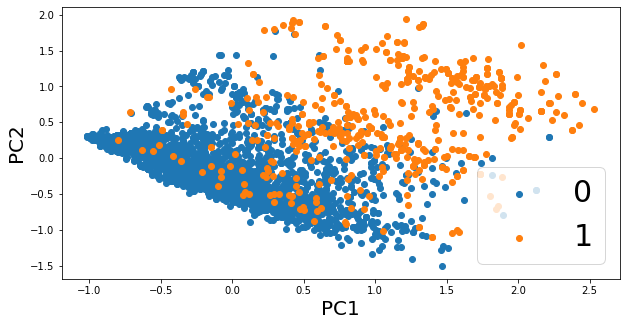

In [429]:
# Group the data by the Label
grouped = principalDf.groupby('Label')

plt.figure(figsize=(10,5))
# Plot each group as a separate scatter plot
for name, group in grouped:
    plt.scatter(group['PC1'], group['PC2'], label=name)

# Add a legend to the plot
plt.legend()

# Label the axes
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.legend(fontsize=30)
# Show the plot
plt.show()


* <b> With 2 PCA variables of Heuiristic variables 

In [430]:
X = p_pca_h   
y = corpus_train["Labels"]

In [431]:
#Splitting the data Train valid

from sklearn.model_selection import train_test_split
X_train,X_valid,y_train,y_valid = train_test_split(X,y,test_size=0.20,stratify=y,random_state=42)

#### CLASSIFYING WITH DIFFERENT MODELS USING DEFAULT HYPER - PARAMETERS

In [433]:
# Intializing objects 

ph_lr_1 = LogisticRegression()                   #logistic regression
ph_rf_1 = RandomForestClassifier()               #random forest
ph_ab_1 = AdaBoostClassifier()                   #adaboost
ph_gb_1 = GradientBoostingClassifier()           #gradientboost
ph_knn_1 = KNeighborsClassifier()                #knn classifier
ph_ldm_1 = LinearDiscriminantAnalysis()          #Linear discriminant
ph_svm_1 = SVC()                                 #support vector machines_classifier

In [434]:
# default model performance on test data
import time
start = time.time()

L = [ph_lr_1,ph_rf_1,ph_ab_1,ph_gb_1,ph_knn_1,ph_ldm_1,ph_svm_1] # List of models

ph_acc_1 = []
ph_f_1 = []
ph_auroc_1 = []
ph_recall_1 = []

for i in L:
    model = i.fit(X_train,y_train)
    pred = model.predict(X_valid)
    
    acc = mat.accuracy_score(y_valid,pred)
    ph_acc_1.append(acc)
    
    f1 = mat.f1_score(y_valid,pred)
    ph_f_1.append(f1)
    
    auroc = mat.roc_auc_score(y_valid,pred)
    ph_auroc_1.append(auroc)
    
    recall_score = mat.recall_score(y_valid,pred)
    ph_recall_1.append(recall_score)
    
end = time.time()

print("________________________________________")
print("timetaken:",1000*(end-start)/60000,"min")     
  
    
df1_def_model = pd.DataFrame({"accuracy":ph_acc_1,"f1_score":ph_f_1,"auroc":ph_auroc_1,"recall_score":ph_recall_1},
                             index=["LogisticRegression","RandomForest","AdaptiveBoosting",
                                    "Gradient_Boosting","KNeighourestNeighbour",
                                    "LinearDiscriminantClassifier","SupportVectorclassifier"
                                    ])
df1_def_model
df1_def_model.style.highlight_max(color = 'lightgreen', axis = 0)

________________________________________
timetaken: 0.2567872961362203 min


,accuracy,f1_score,auroc,recall_score
LogisticRegression,0.976923,0.912621,0.942434,0.895238
RandomForest,0.975641,0.902564,0.917566,0.838095
AdaptiveBoosting,0.965385,0.873239,0.931746,0.885714
Gradient_Boosting,0.978205,0.916256,0.939153,0.885714
KNeighourestNeighbour,0.957692,0.813559,0.842857,0.685714
LinearDiscriminantClassifier,0.973077,0.898551,0.936190,0.885714
SupportVectorclassifier,0.978205,0.917073,0.943175,0.895238


 * <B>FINDING THE BEST PARAMETERS FOR THE TOP-3 MODELS BASED ON <U><I>F1 SCORE</I></U> AND EVALUATING THEM ON VALIDATION DATA

##### <font color= GREEN ><u>LOGISTIC REGRESSION

#### Choosing best parameters

In [435]:
start = time.time()

solvers = ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']
penalty = ['none', 'l1', 'l2', 'elasticnet']
c_values = [100, 10, 1.0, 0.1, 0.01]


grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=5, random_state=42)

ph_lr_2 =RandomizedSearchCV(estimator=ph_lr_1, param_distributions=grid, n_jobs=-1, cv=cv, scoring='f1',error_score=0)
ph_lr_2.fit(X_train, y_train)


end = time.time()

print("timetaken:",1000*(end-start)/60000,"min")

ph_lr_2.best_params_

timetaken: 0.8950729091962178 min


{'solver': 'newton-cg', 'penalty': 'l2', 'C': 1.0}

#### Model testing with best parameters

In [447]:
ph_lr_2 = LogisticRegression(solver= 'newton-cg', penalty= 'l2', C= 1 ,random_state=42)
ph_lr_2.fit(X_train,y_train) 

LogisticRegression(C=1, random_state=42, solver='newton-cg')

In [448]:
#Prediction on validation data
y_pred = ph_lr_2.predict(X_valid)

In [449]:
#accuracy score
ph_lr_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ph_lr_acc_2)

#f1 score
ph_lr_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ph_lr_f1_2)

#auroc score
ph_lr_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ph_lr_auroc_2)

#recall
ph_lr_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ph_lr_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9769230769230769
F1 Score: 0.9126213592233011
Auroc: 0.9424338624338624
Recall 0.8952380952380953
[[668   7]
 [ 11  94]]


##### <font color= GREEN ><u>GRADIENT BOOSTING

#### Choosing best parameters

In [104]:
# Finding the best parameter
start = time.time()

grid = {
        'max_depth':[8,10,12,14],
        'learning_rate':[0.01,0.05,0.1],
        'n_estimators':np.arange(100,600,100)
       }

#Initializing gradient boosting object
ph_gb = GradientBoostingClassifier()
#Gridsearch and cross validating on different combination of hyperparameters
ph_gb_cv = RandomizedSearchCV(gb, param_distributions=grid,n_iter=10,cv = 5) #50fols -320min 
ph_gb_cv.fit(X_train,y_train) #try using balanced data

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",ph_gb_cv.best_params_)

timetaken: 320.82 min
Best Parameters: {'n_estimators': 500, 'max_depth': 12, 'learning_rate': 0.05}


#### Model evaluation with best parameters

In [450]:
#fitting the model with best parameter
start = time.time()

ph_gb2 = GradientBoostingClassifier(learning_rate = 0.05, max_depth =12, n_estimators = 500,random_state=42)
ph_gb2.fit(X_train,y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 3.2 min


In [451]:
#Prediction on validation data
y_pred = ph_gb2.predict(X_valid)

In [452]:
#accuracy score
ph_gb_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ph_gb_acc_2)

#f1 score
ph_gb_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ph_gb_f1_2)

#auroc score
ph_gb_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ph_gb_auroc_2)

#recall
ph_gb_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ph_gb_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm= mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9743589743589743
F1 Score: 0.9
Auroc: 0.9248677248677248
Recall 0.8571428571428571
[[670   5]
 [ 15  90]]


##### <font color= GREEN ><u>SUPPORT VECTOR CLASSIFIER

#### Choosing best parameters

In [443]:
#Finding the best parameter
start = time.time()

#defining parameter range
param_grid = {'C': [50, 10, 1.0, 0.1, 0.01], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['poly', 'rbf', 'sigmoid']} 
  
ph_svc_cv = RandomizedSearchCV(SVC(), param_grid, refit = True, verbose = 3)
  
#fitting the model for grid search
ph_svc_cv.fit(X_train, y_train)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

print("Best Parameters:",ph_svc_cv.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.936 total time=   0.2s
[CV 2/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.931 total time=   0.5s
[CV 3/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.946 total time=   0.3s
[CV 4/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.936 total time=   0.3s
[CV 5/5] END ....C=10, gamma=0.0001, kernel=rbf;, score=0.944 total time=   0.2s
[CV 1/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.867 total time=   0.1s
[CV 2/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.867 total time=   0.1s
[CV 3/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.1s
[CV 4/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.2s
[CV 5/5] END ..C=0.1, gamma=0.0001, kernel=poly;, score=0.865 total time=   0.3s
[CV 1/5] END .....C=50, gamma=0.01, kernel=poly;, score=0.875 total time=   0.3s
[CV 2/5] END .....C=50, gamma=0.01, kernel=poly;

#### Model evaluation with best parameters

In [453]:
#fitting the model with best parameter
ph_svc_cv = SVC(kernel = 'sigmoid', gamma = 0.01, C = 10)
ph_svc_cv.fit(X_train,y_train)

SVC(C=10, gamma=0.01, kernel='sigmoid')

In [454]:
#Prediction on test data with best parameters
y_pred = ph_svc_cv.predict(X_valid)

In [455]:
#accuracy score
ph_svc_acc_2 = mat.accuracy_score(y_valid,y_pred)
print("Accuracy :",ph_svc_acc_2)

ph_svc_f1_2 = mat.f1_score(y_valid,y_pred)
print("F1 Score:",ph_svc_f1_2)

ph_svc_auroc_2 = mat.roc_auc_score(y_valid,y_pred)
print("Auroc:",ph_svc_auroc_2)

#recall
ph_svc_recall_score_2 = mat.recall_score(y_valid,y_pred)
print("Recall",ph_svc_recall_score_2)

#print(classification_report(y_valid, y_pred))

cm = mat.confusion_matrix(y_valid,y_pred)
#sns.heatmap(cm,annot=True)
print(cm)

Accuracy : 0.9717948717948718
F1 Score: 0.8942307692307693
Auroc: 0.9354497354497354
Recall 0.8857142857142857
[[665  10]
 [ 12  93]]


In [456]:
from IPython.display import display_html
pd.set_option('display.colheader_justify', 'center')

indexes1 = ["LogisticRegression","RandomForest","AdaptiveBoosting","Gradient_Boosting",
            "KNeighourestNeighbour","LinearDiscriminantClassifier","SupportVectorclassifier"]

indexes2 = ["LogisticRegression","Gradient_Boosting","SupportVectorclassifier"]

df1 = pd.DataFrame({"Accuracy":ph_acc_1,"F1_score":ph_f_1,"Auroc":ph_auroc_1,"Recall":ph_recall_1},index=indexes1)

df2 = pd.DataFrame({"Accuracy":[ph_lr_acc_2,ph_gb_acc_2,ph_svc_acc_2],
                    "F1_Score":[ph_lr_f1_2,ph_gb_f1_2,ph_svc_f1_2],
                    "Auroc":[ph_lr_auroc_2,ph_gb_auroc_2,ph_svc_auroc_2],
                   "Recall":[ph_lr_recall_score_2,ph_gb_recall_score_2,ph_svc_recall_score_2]},index=indexes2)


df1_style = df1.style.set_table_attributes("style='display:inline; margin-right:20px;'").set_caption("Model Performance on Validation_data with default params")
df2_style = df2.style.set_table_attributes("style='display:inline'").set_caption("Best Model's Performance on Validation_data with Optimized params")

display_html(df1_style._repr_html_() + df2_style._repr_html_(), raw=True)


,Accuracy,F1_score,Auroc,Recall
LogisticRegression,0.976923,0.912621,0.942434,0.895238
RandomForest,0.975641,0.902564,0.917566,0.838095
AdaptiveBoosting,0.965385,0.873239,0.931746,0.885714
Gradient_Boosting,0.978205,0.916256,0.939153,0.885714
KNeighourestNeighbour,0.957692,0.813559,0.842857,0.685714
LinearDiscriminantClassifier,0.973077,0.898551,0.936190,0.885714
SupportVectorclassifier,0.978205,0.917073,0.943175,0.895238
,Accuracy,F1_Score,Auroc,Recall
LogisticRegression,0.976923,0.912621,0.942434,0.895238
Gradient_Boosting,0.974359,0.900000,0.924868,0.857143


##### OBSERVATIONS FROM HEUIRISTIC APPROACH:

* <font color= RED><b>Random forest model performed the best with Unscaled data with a F1 score of 0.91
* <font color= RED><b>Logistic Regression model performed the best with scaled data(PCA-with 100components) with a F1 score of 0.912

# .................................................................................................................................

### <font color= BLUE>9. COMPARING THE MODEL RESULTS

#### TF APPROACH
* <font color= RED><b>LOGISTIC REGRESSION model performed the best with Unscaled data with a F1 score of 0.94
* <font color= RED><b>LOGISTIC REGRESSION model performed the best with Scaled data(PCA 261components) with a F1 score of 0.89

#### TFIDF APPROACH
* <font color= RED><b>ADABOOST model performed the best with Unscaled data with a F1 score of 0.861
* <font color= RED><b>RANDOM FOREST model performed the best with scaled data(PCA 53components) with a F1 score of 0.869

#### DOC2VEC
* <font color= RED><b>RANDOM FOREST model performed the best with Unscaled data with a F1 score of 0.946
* <font color= RED><b>RANDOM FOREST model performed the best with scaled data(PCA-with 2components) with a F1 score of 0.919

#### HEUIRISTIC APPROACH
* <font color= RED><b>RANDOM FOREST model performed the best with Unscaled data with a F1 score of 0.91
* <font color= RED><b>LOGESTIC REGRESSION model performed the best with scaled data(PCA-with 100components) with a F1 score of 0.912

* <font color= DARKGREEN><b><b>Out of all the approches and model's performance on each approach , Random forest performed the best with F1 score of 0.946 on unscaled DOC2VEC validation set.However after the PCA dimensionality reduction just with 2 principal components the Random forest model still could give a F1 score of 0.919 which shows DOC2VEC as the best approach.

# .................................................................................................................................

### <font color= BLUE>10.<font color= BLUE> IMPLEMENTING THE BEST MODEL WITH APPROACH ON TEST DATA

### DOC2VEC -- RANDOM FOREST

In [459]:
# load test data
corpus_test = pd.read_csv("corpus_test.csv")
corpus_test = corpus_test.dropna(axis=0)

### 1. Embeddings

In [460]:
start = time.time()

embeddings = KeyedVectors.load_word2vec_format('./GoogleNews-vectors-negative300.bin', binary = True)

end = time.time()

print("timetaken:",round((1000*(end-start)/60000),2),"min") # to compute the time taken for the process

timetaken: 3.15 min


### 2. Doc2Vec using genism

In [464]:
corpus_test

,SMS,Labels
0,winner u specially selected 2 receive £1000 cash 4 holiday flight inc speak live operator 2 claim 0871277810810,1
1,bring tat cd forget,0
2,tried contact reply offer video phone 750 anytime network min half price line rental camcorder reply call 08000930705,1
3,st andre virgil s cream,0
4,hi wkend ok journey terrible wk good huge back log marking,0
...,...,...
1667,hey leave friday wait ask superior tell,0
1668,s trouble class go well due dodgey one … expecting mine tomo see recovery time place,0
1669,ur going 2 bahamas callfreefone 08081560665 speak live operator claim either bahamas cruise of£2000 cash 18only opt txt x 07786200117,1
1670,joy s father john john joy s father u an th hav lt gt iq ti ia question try answer,0


In [465]:
wordslist1 = []
for sentence in corpus_test.SMS:
    for word in sentence:
        wordslist1.append(word)

In [466]:
len(wordslist1)

94873

In [467]:
wordslist1 = list(set(wordslist1))

In [468]:
len(wordslist1)

48

In [469]:
word_embeddings = {}
for word in embeddings.index_to_key:
    if word in wordslist1:
        word_embeddings[word] = embeddings[word]

In [477]:
DocVecs2 = []
for sentence in corpus_test.SMS:
    doc_vec_for_each_sent = np.zeros(300)
    for words in sentence:
        if words in word_embeddings.keys():
            doc_vec_for_each_sent = np.add(doc_vec_for_each_sent,
                                          word_embeddings[words])
    #doc_vec_for_each_sent = np.divide(doc_vec_for_each_sent,len(sentence))
    DocVecs2.append(doc_vec_for_each_sent)

In [478]:
X = pd.DataFrame(DocVecs2)
X.shape

(1671, 300)

In [479]:
X.to_csv('docsembedded_test.csv',index=False)

* <B> Split test data set

In [480]:
X_test = pd.read_csv('docsembedded_test.csv')
y_test = corpus_test["Labels"]

In [481]:
X_test.shape

(1671, 300)

In [482]:
y_test.shape

(1671,)

##### <font color= GREEN ><u>RANDOM FOREST

In [483]:
#Prediction on test data
y_pred = d2v_rf_2.predict(X_test)

Accuracy : 0.9766606822262118
F1 Score: 0.9095127610208817
Auroc: 0.9336990324809952
Recall 0.875
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1447
           1       0.95      0.88      0.91       224

    accuracy                           0.98      1671
   macro avg       0.96      0.93      0.95      1671
weighted avg       0.98      0.98      0.98      1671



<AxesSubplot:>

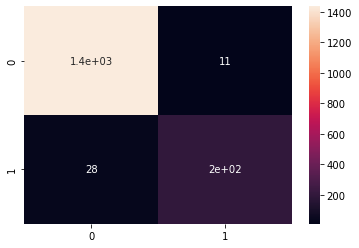

In [486]:
#accuracy score
d2v_rf_acc_2 = mat.accuracy_score(y_test,y_pred)
print("Accuracy :",d2v_rf_acc_2)

#f1 score
d2v_rf_f1_2 = mat.f1_score(y_test,y_pred)
print("F1 Score:",d2v_rf_f1_2)

#auroc score
d2v_rf_auroc_2 = mat.roc_auc_score(y_test,y_pred)
print("Auroc:",d2v_rf_auroc_2)

#recall
d2v_rf_recall_score_2 = mat.recall_score(y_test,y_pred)
print("Recall",d2v_rf_recall_score_2)

print(classification_report(y_test, y_pred))

cm= mat.confusion_matrix(y_test,y_pred)
sns.heatmap(cm,annot=True)
#print(cm)

# .................................................................................................................................

### <font color= BLUE>11. CONCLUSION

#### The F1 score on test data with DOC2VEC approach using Random forest model is 0.909.
